# Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings

In [87]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

# Application Data

In [88]:
# Reading dataset from local
df = pd.read_csv('application_data.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [89]:
# Determining the shape of the datset
df.shape

(307511, 122)

#### Handling missing values in columns


In [93]:
# Count missing values column wise in percentages
missing_value_percentages  = df.isnull().mean()
missing_value_percentages 

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [94]:
# Calculate the percentage of missing values having more than 30% for each column 
columns_with_high_missing_values = missing_value_percentages [missing_value_percentages  >= 0.3].index.tolist()
num_columns_high_missing  = len(columns_with_high_missing_values )
num_columns_high_missing 

50

In [95]:
# Delete those 50 columns
df = df.drop(columns_with_high_missing_values,axis=1)

In [96]:
# Checking the number of remaining columns
len(df.columns) #i.e 122-50 rows

72

##### List and delete the columns, which are not much relevant for the analysis

In [97]:
# Remove unwanted columns from this dataset
irrelevant = [
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
    'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
    'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'DAYS_REGISTRATION', 'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    'NAME_TYPE_SUITE'
]
df = df.drop(labels=irrelevant,axis=1)

In [98]:
# Determining the shape of the datset
df.shape

(307511, 30)

In [99]:
# Checking the remaining columns
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

#### Imputing Rows

In [100]:
# Percent of missing values in columns
(round(100*(df.isnull().sum()/len(df.index)),3))

SK_ID_CURR                     0.000
TARGET                         0.000
NAME_CONTRACT_TYPE             0.000
CODE_GENDER                    0.000
FLAG_OWN_CAR                   0.000
FLAG_OWN_REALTY                0.000
CNT_CHILDREN                   0.000
AMT_INCOME_TOTAL               0.000
AMT_CREDIT                     0.000
AMT_ANNUITY                    0.004
AMT_GOODS_PRICE                0.090
NAME_INCOME_TYPE               0.000
NAME_EDUCATION_TYPE            0.000
NAME_FAMILY_STATUS             0.000
NAME_HOUSING_TYPE              0.000
REGION_POPULATION_RELATIVE     0.000
DAYS_BIRTH                     0.000
DAYS_EMPLOYED                  0.000
DAYS_ID_PUBLISH                0.000
REG_REGION_NOT_LIVE_REGION     0.000
REG_REGION_NOT_WORK_REGION     0.000
ORGANIZATION_TYPE              0.000
EXT_SOURCE_2                   0.215
EXT_SOURCE_3                  19.825
AMT_REQ_CREDIT_BUREAU_HOUR    13.502
AMT_REQ_CREDIT_BUREAU_DAY     13.502
AMT_REQ_CREDIT_BUREAU_WEEK    13.502
A

Treating missing values in `EXT_SOURCE_2` and `EXT_SOURCE_3`

In [101]:
# Count the rows where EXT_SOURCE_2 and EXT_SOURCE_3 both are empty
len(df[np.isnan(df['EXT_SOURCE_2']) & np.isnan(df['EXT_SOURCE_3'])])

230

In [102]:
# We have total 307511 records deleting 230 records will not affect our analysis
df = df[df['EXT_SOURCE_2'].notna() | df['EXT_SOURCE_3'].notna()]

In [103]:
# Comparing EXT_SOURCE_2 and EXT_SOURCE_3 column 
ext_source_columns = df[['EXT_SOURCE_2', 'EXT_SOURCE_3']]

# Calculate descriptive statistics for these columns
ext_source_stats = ext_source_columns.describe()

# Round the descriptive statistics to three decimal places
rounded_ext_source_stats = ext_source_stats.round(3)
rounded_ext_source_stats

EXT_SOURCE_2  EXT_SOURCE_3
count    306851.000    246546.000
mean          0.514         0.511
std           0.191         0.195
min           0.000         0.001
25%           0.392         0.371
50%           0.566         0.535
75%           0.664         0.669
max           0.855         0.896

`EXT_SOURCE_2` and `EXT_SOURCE_3` columns in the DataFrame df have a relatively small difference between their mean (average) and median (50th percentile) values. Additionally, the distribution of values between the 25th and 75th percentiles is even, indicating a symmetrical distribution of data in these columns. Based on this analysis, we can consider using the mean of each column to impute (fill in) missing values.

In [104]:
# Imputing EXT_SOURCE_2 and EXT_SOURCE_3 by mean values

df.loc[np.isnan(df['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = df['EXT_SOURCE_2'].mean()
df.loc[np.isnan(df['EXT_SOURCE_3']), ['EXT_SOURCE_3']] = df['EXT_SOURCE_3'].mean()

In [105]:
(round(100*(df.isnull().sum()/len(df.index)),3))

SK_ID_CURR                     0.000
TARGET                         0.000
NAME_CONTRACT_TYPE             0.000
CODE_GENDER                    0.000
FLAG_OWN_CAR                   0.000
FLAG_OWN_REALTY                0.000
CNT_CHILDREN                   0.000
AMT_INCOME_TOTAL               0.000
AMT_CREDIT                     0.000
AMT_ANNUITY                    0.004
AMT_GOODS_PRICE                0.090
NAME_INCOME_TYPE               0.000
NAME_EDUCATION_TYPE            0.000
NAME_FAMILY_STATUS             0.000
NAME_HOUSING_TYPE              0.000
REGION_POPULATION_RELATIVE     0.000
DAYS_BIRTH                     0.000
DAYS_EMPLOYED                  0.000
DAYS_ID_PUBLISH                0.000
REG_REGION_NOT_LIVE_REGION     0.000
REG_REGION_NOT_WORK_REGION     0.000
ORGANIZATION_TYPE              0.000
EXT_SOURCE_2                   0.000
EXT_SOURCE_3                   0.000
AMT_REQ_CREDIT_BUREAU_HOUR    13.469
AMT_REQ_CREDIT_BUREAU_DAY     13.469
AMT_REQ_CREDIT_BUREAU_WEEK    13.469
A

`AMT_ANNUITY` columns is having very few null values rows. So we can impute those missing banks with median value

In [106]:
# Treating missing values in AMT_ANNUITY median. 
values= df['AMT_ANNUITY'].median()

df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

Treating missing values in `AMT_GOODS_PRICE`

In [107]:
# Generate count, mean, std, min, 25%, 50%, 75%, and max values for for 'AMT_GOODS_PRICE'
df['AMT_GOODS_PRICE'].describe().apply(lambda x: f"{x:.2f}")

count     307004.00
mean      538484.20
std       369486.08
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

In [112]:
df.boxplot(column =['AMT_GOODS_PRICE']) 

<Axes: >

We see the `AMT_GOODS_PRICE` has good amount of outliers So, imputing missing values with mean or median might lead to skewed results.Considering that the records with missing 'AMT_GOODS_PRICE' values represent a mere 0.09% of the entire dataset, removing these particular entries would be preferred.

In [113]:
df = df[df['AMT_GOODS_PRICE'].notna()]

We have total 5 columns for number of enquiries to Credit Bureau about the client which may not be rrequired for our analysis. So we can :
1. handle missing data for the column `AMT_REQ_CREDIT_BUREAU_QRT`
2. delete the column corresponding to count of hour, day, week, month and year.

In [114]:
# Handling AMT_REQ_CREDIT_BUREAU_QRT 
df['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265662.000000
mean          0.265552
std           0.794315
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

This is an integer type variable i.e this column contains values like 0, 1, 2 etc. We cannot impute the NaNs by the mean or the median.
Thus, we need to impute them by mode - the most common occurring value in the column.

In [115]:
# converting AMT_REQ_CREDIT_BUREAU_QRT to type 'category'
df['AMT_REQ_CREDIT_BUREAU_QRT'] = df['AMT_REQ_CREDIT_BUREAU_QRT'].astype('category')

# displaying frequencies of each category
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215133
1.0       33836
2.0       14393
3.0        1716
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

The most common value of `AMT_REQ_CREDIT_BUREAU_QRT` is 0, so let's impute the NaNs in the column by 0.

In [116]:
# Imputing AMT_REQ_CREDIT_BUREAU_QRT with 0
df.loc[pd.isnull(df['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0

In [117]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR
df = df.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [122]:
(round(100*(df.isnull().sum()/len(df.index)),3))

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
REGION_POPULATION_RELATIVE    0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
DAYS_ID_PUBLISH               0.0
REG_REGION_NOT_LIVE_REGION    0.0
REG_REGION_NOT_WORK_REGION    0.0
ORGANIZATION_TYPE             0.0
EXT_SOURCE_2                  0.0
EXT_SOURCE_3                  0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
dtype: float64

We now have a dataframe with no missing values.

In [123]:
df.shape

(307004, 25)

In [124]:
# Percentage of rows lost
(100 - 100*(len(df.index)/307511)) #At the begining we had `307511` rows.

0.16487215091493113

We just have lost 0.16% rows in the entire data cleaning process

#### Converting `DAYS_BIRTH` column into `AGE` column for readablity and analysis

In [125]:
# Divide 'DAYS_BIRTH' by 365 for calculating Age
df['AGE'] = abs(df['DAYS_BIRTH']//365)

#### Converting `DAYS_EMPLOYED` column into `YEARS_EMPLOYED` column for readablity and analysis

In [126]:
# Divide 'DAYS_EMPLOYED' by 365 for calculating YEAR_EMPLOYED
df['YEARS_EMPLOYED'] = abs(df['DAYS_EMPLOYED']//365)

In [127]:
# Drop 'DAYS_BIRTH','DAYS_EMPLOYED' columns since we no longer need them now.
duplicated = ['DAYS_BIRTH','DAYS_EMPLOYED']
df = df.drop(duplicated,axis=1)

In [128]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0            -2120                           0                           0   
1             -291                           0                           0   
2            -2531                           0                           0   
3            -2437                           0                           0   
4            -3458                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246      0.510853   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442      0.510853   
4                Religion      0.322738      0.510853   

  AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED  
0                       0.0   26               2  
1                       0.0   46               4  
2                       0.0   53               1  
3                       0.0   53               9  
4                       0.0   55               9

### Removing outliers

In [129]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AGE']
for col in col_list_outlier:
    # Calculate Q1, Q3, and the interquartile range
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the dataframe
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.shape

(281253, 25)

In [130]:
# Percentage of rows lost
round((100 - 100*(len(df.index)/307511)),2)

8.54

Though we lost around 8.5% rows in the outliers handling exercise, we got rid of the outliers for fair analysis of the data.  

### Checking Data Imbalance

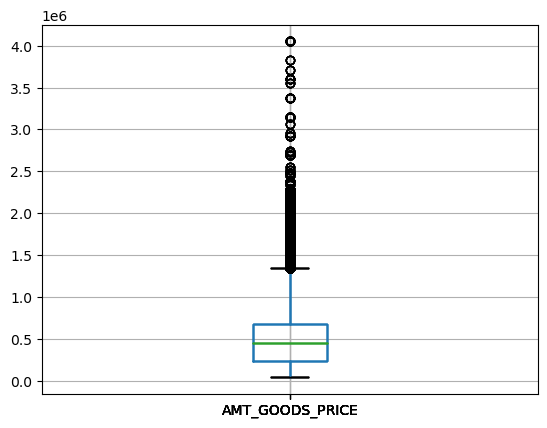

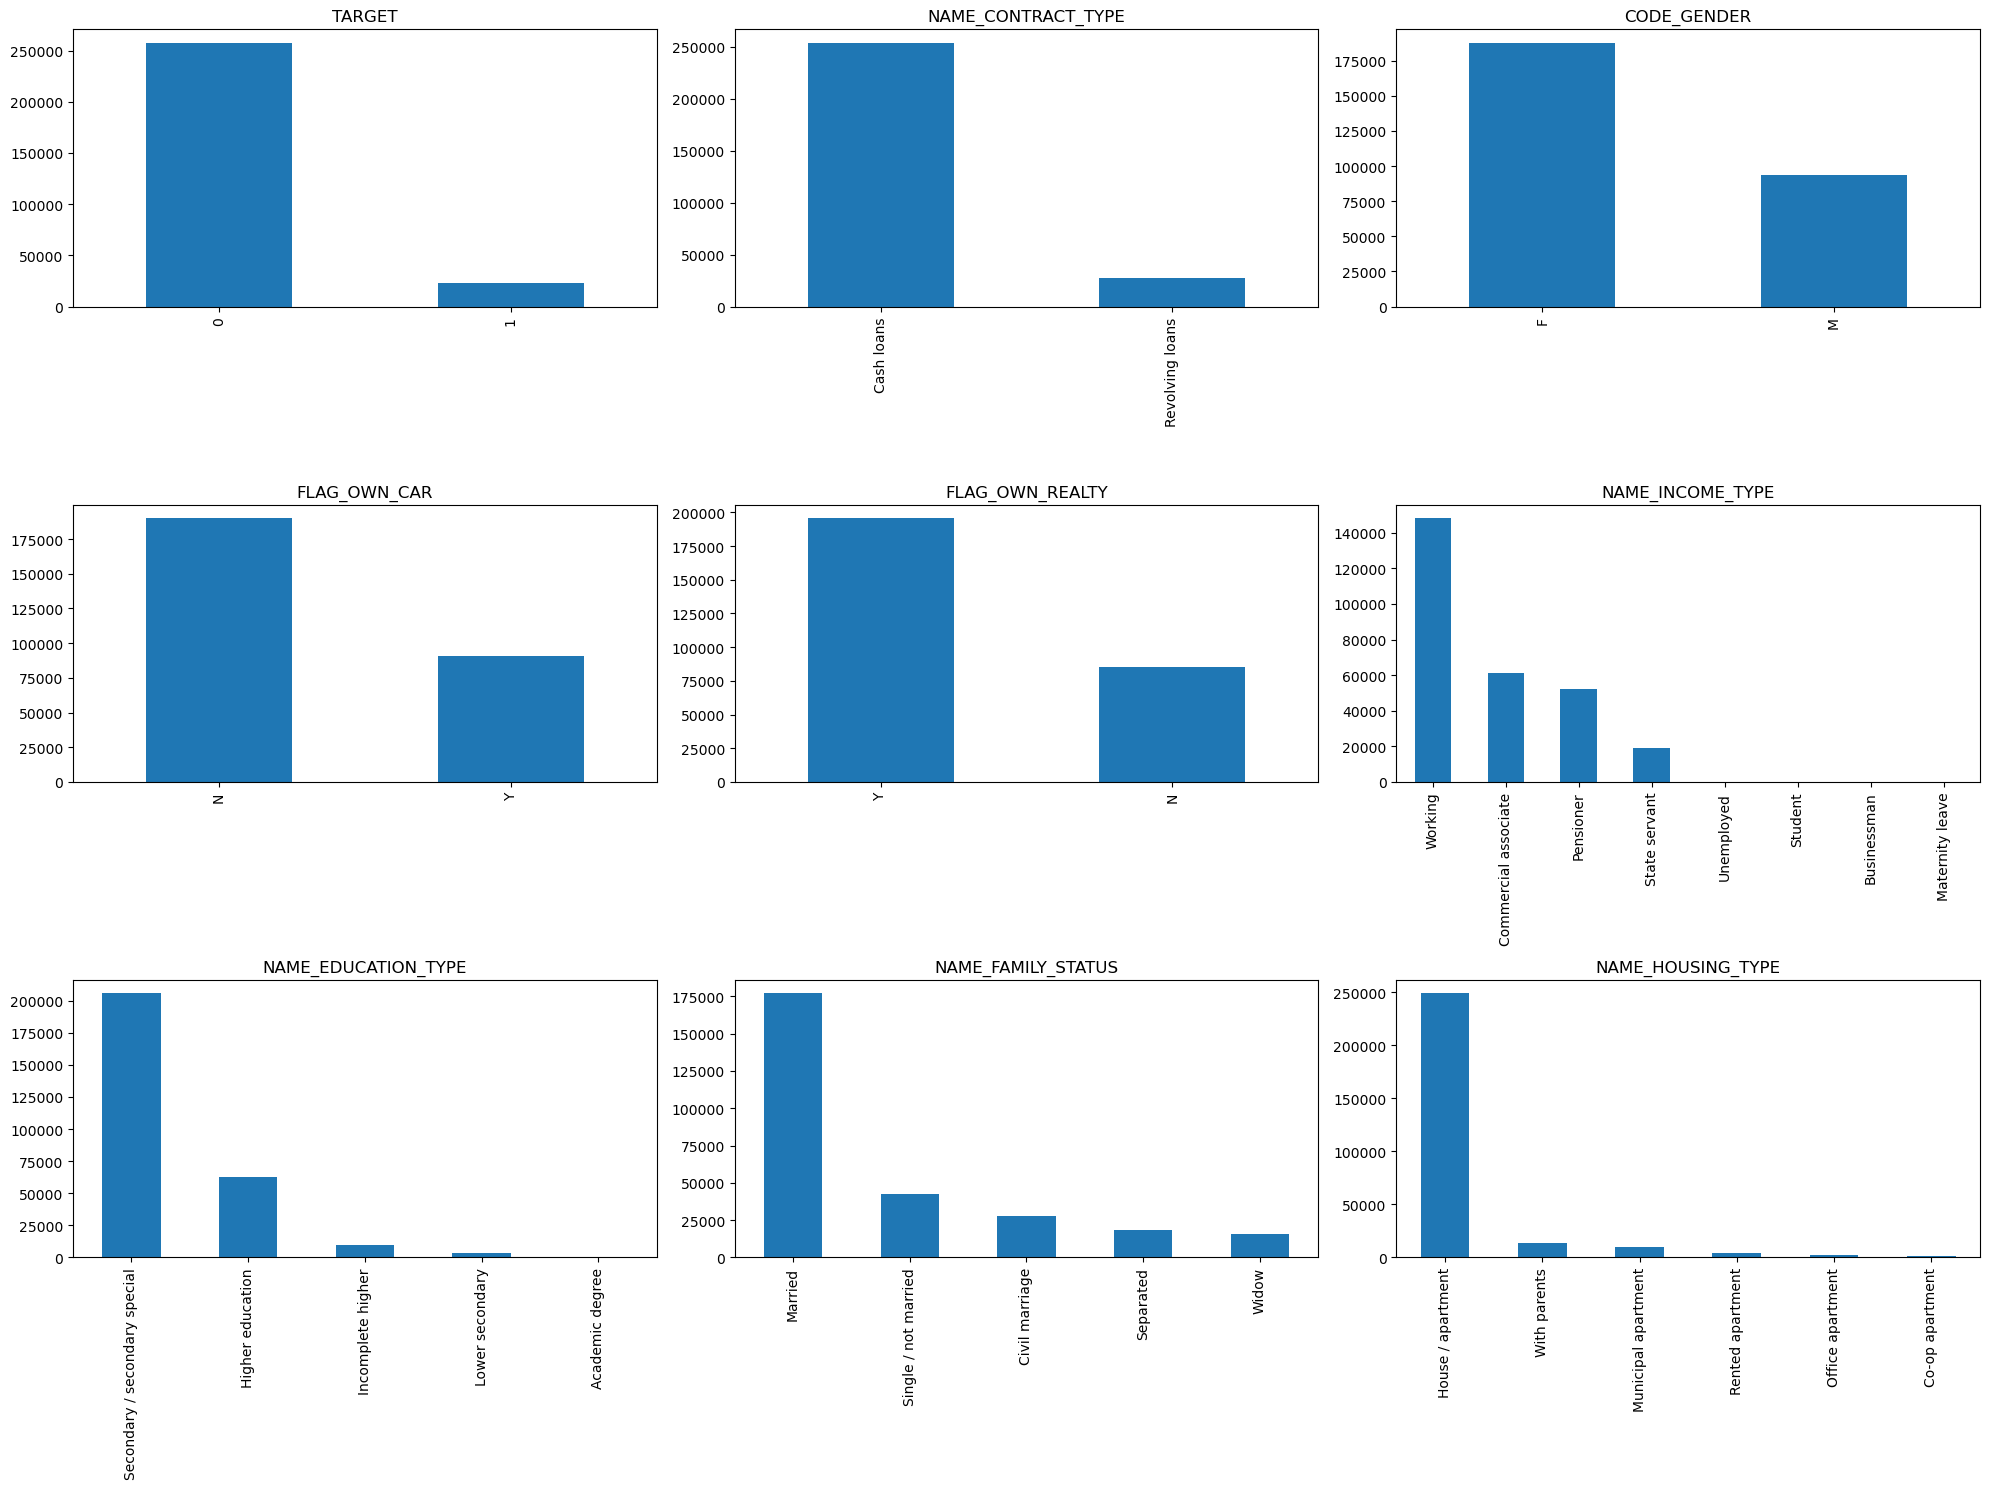

In [131]:
# List of columns to check for data imbalance
columns_to_plot = [
    'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'
]
plot_number = 0
plt.figure(figsize=(20, 15))
for column in columns_to_plot:
    plot_number += 1
    plt.subplot(3, 3, plot_number)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

plt.tight_layout()
plt.show()

We can observe data imbalance in below columns:-
1. `TARGET` -  There are very few `defaulters(1)` compare to `non defaulters(0)`.
2. `NAME_CONTRACT_TYPE` - There are very few `Revolving loans` than `Cash loans`.
3. `NAME_EDUCATION_TYPE` - Most of the loans are applied by `Secondary/Secondary special` educated people over others.
4. `NAME_FAMILY_STATUS` - Most of the loans applied by `Married people`.
5. `NAME_HOUSING_TYPE` - Most of the applicants came from `Home/apartment` housing type.


#### Binning of `AGE`,  `AMT_INCOME_TOTAL`, `AMT_CREDIT` and `EXT_SOURCE_SCORE` columns for better understanding of data

#### Creating three age groups - Young, Mid age and Senior citizen

In [132]:
df['AGE'].describe()

count    281253.000000
mean         44.410186
std          12.094055
min          21.000000
25%          34.000000
50%          44.000000
75%          55.000000
max          70.000000
Name: AGE, dtype: float64

In [133]:
# Define function for categorizing AGE_GROUP (Young, Mid age and Senior Citizen)
def age_group(age):
    if age < 40:
        return 'Young'
    elif age < 60:  
        return 'Mid Age'
    else:
        return 'Senior Citizen'

In [134]:
#Creating new column AGE_GROUP
df['AGE_GROUP'] = df['AGE'].apply(age_group)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0            -2120                           0                           0   
1             -291                           0                           0   
2            -2531                           0                           0   
3            -2437                           0                           0   
4            -3458                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246      0.510853   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442      0.510853   
4                Religion      0.322738      0.510853   

  AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED AGE_GROUP  
0                       0.0   26               2     Young  
1                       0.0   46               4   Mid Age  
2                       0.0   53               1   Mid Age  
3                       0.0   53               9   Mid Age  
4                       0.0   55               9   Mid Age

#### Creating three credit amount groups - High, medium and low

In [135]:
round(df['AMT_CREDIT'].describe(),3)

count     281253.000
mean      535928.701
std       319781.527
min        45000.000
25%       270000.000
50%       483480.000
75%       755190.000
max      1569042.000
Name: AMT_CREDIT, dtype: float64

In [136]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(amount):
    if amount < 500000:
        return 'Low'
    elif amount < 750000:
        return 'Medium'
    else:
        return 'High'

In [137]:
#Creating new column CREDIT_GROUP
df['CREDIT_GROUP'] = df['AMT_CREDIT'].apply(credit_group)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0            -2120                           0                           0   
1             -291                           0                           0   
2            -2531                           0                           0   
3            -2437                           0                           0   
4            -3458                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246      0.510853   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442      0.510853   
4                Religion      0.322738      0.510853   

  AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED AGE_GROUP CREDIT_GROUP  
0                       0.0   26               2     Young          Low  
1                       0.0   46               4   Mid Age         High  
2                       0.0   53               1   Mid Age          Low  
3                       0.0   53               9   Mid Age          Low  
4                       0.0   55               9   Mid Age       Medium

#### Creating three income groups - High, medium and Low

In [138]:
df['AMT_INCOME_TOTAL'].describe()

count    281253.000000
mean     151810.662682
std       62858.819706
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      184500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [139]:
# Define function for categorizing AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(income):
    if income < 100000:
        return 'Low'
    elif income < 150000:
        return 'Medium'
    return 'High'

In [140]:
# Creating new column INCOME_GROUP
df['INCOME_GROUP'] = df['AMT_INCOME_TOTAL'].apply(income_group)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0            -2120                           0                           0   
1             -291                           0                           0   
2            -2531                           0                           0   
3            -2437                           0                           0   
4            -3458                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246      0.510853   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442      0.510853   
4                Religion      0.322738      0.510853   

  AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED AGE_GROUP CREDIT_GROUP  \
0                       0.0   26               2     Young          Low   
1                       0.0   46               4   Mid Age         High   
2                       0.0   53               1   Mid Age          Low   
3                       0.0   53               9   Mid Age          Low   
4                       0.0   55               9   Mid Age       Medium   

  INCOME_GROUP  
0         High  
1         High  
2          Low  
3       Medium  
4       Medium

For the simplification of analysis for external data source, we are taking average of two different external data sources (`EXT_SOURCE_2` and `EXT_SOURCE_3`) and creating a new column called **EXT_SOURCE_AVG_SCORE**

In [141]:
df['EXT_SOURCE_AVG_SCORE'] = round(((df['EXT_SOURCE_2'] + df['EXT_SOURCE_3'])/2),2)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0            -2120                           0                           0   
1             -291                           0                           0   
2            -2531                           0                           0   
3            -2437                           0                           0   
4            -3458                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246      0.510853   
2              Government      0.555912      0.729567   
3  Business Entity Type 3      0.650442      0.510853   
4                Religion      0.322738      0.510853   

  AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED AGE_GROUP CREDIT_GROUP  \
0                       0.0   26               2     Young          Low   
1                       0.0   46               4   Mid Age         High   
2                       0.0   53               1   Mid Age          Low   
3                       0.0   53               9   Mid Age          Low   
4                       0.0   55               9   Mid Age       Medium   

  INCOME_GROUP  EXT_SOURCE_AVG_SCORE  
0         High                  0.20  
1         High                  0.57  
2          Low                  0.64  
3       Medium                  0.58  
4       Medium                  0.42

In [142]:
# Dropping (EXT_SOURCE_2 and EXT_SOURCE_3 columns
df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

#### Creating three External source score groups - High, Medium and Low

In [143]:
df['EXT_SOURCE_AVG_SCORE'].describe()

count    281253.000000
mean          0.509189
std           0.135854
min           0.000000
25%           0.420000
50%           0.530000
75%           0.610000
max           0.840000
Name: EXT_SOURCE_AVG_SCORE, dtype: float64

In [144]:
# Define function for categorizing EXT_SOURCE_AVG_SCORE (Low, Medium and High)
def categorize_ext_source(score):
    if score < 0.4:
        return 'Low'
    elif score < 0.6:
        return 'Medium'
    return 'High'

In [145]:
# Creating a new column EXT_SCORE_AVG_CATEGORY 
df['EXT_SCORE_AVG_CATEGORY'] = df['EXT_SOURCE_AVG_SCORE'].apply(categorize_ext_source)
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_ID_PUBLISH  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0            -2120                           0                           0   
1             -291                           0                           0   
2            -2531                           0                           0   
3            -2437                           0                           0   
4            -3458                           0                           0   

        ORGANIZATION_TYPE AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED  \
0  Business Entity Type 3                       0.0   26               2   
1                  School                       0.0   46               4   
2              Government                       0.0   53               1   
3  Business Entity Type 3                       0.0   53               9   
4                Religion                       0.0   55               9   

  AGE_GROUP CREDIT_GROUP INCOME_GROUP  EXT_SOURCE_AVG_SCORE  \
0     Young          Low         High                  0.20   
1   Mid Age         High         High                  0.57   
2   Mid Age          Low          Low                  0.64   
3   Mid Age          Low       Medium                  0.58   
4   Mid Age       Medium       Medium                  0.42   

  EXT_SCORE_AVG_CATEGORY  
0                    Low  
1                 Medium  
2                   High  
3                 Medium  
4                 Medium

### Divide the provided data set into two sets 
##### Client with payment difficulties (Target=1) 
##### All other cases (Target=0) 

In [146]:
# Client with payment difficulties (Target=1)
df_application_target_1 = df[df['TARGET'] == 1]
df_application_target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          351000.0               Working  Secondary / secondary special   
26         702000.0               Working  Secondary / secondary special   
40         855000.0  Commercial associate  Secondary / secondary special   
42         238500.0               Working  Secondary / secondary special   
81         252000.0             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    DAYS_ID_PUBLISH  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0             -2120                           0                           0   
26            -1827                           0                           0   
40            -1029                           0                           0   
42            -4409                           0                           0   
81            -4199                           0                           0   

         ORGANIZATION_TYPE AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED  \
0   Business Entity Type 3                       0.0   26               2   
26  Business Entity Type 3                       2.0   52               8   
40  Business Entity Type 3                       0.0   48               4   
42           Self-employed                       0.0   37              10   
81                     XNA                       0.0   68            1000   

         AGE_GROUP CREDIT_GROUP INCOME_GROUP  EXT_SOURCE_AVG_SCORE  \
0            Young          Low         High                  0.20   
26         Mid Age         High       Medium                  0.37   
40         Mid Age         High         High                  0.31   
42           Young          Low       Medium                  0.54   
81  Senior Citizen          Low          Low                  0.37   

   EXT_SCORE_AVG_CATEGORY  
0                     Low  
26                    Low  
40                    Low  
42                 Medium  
81                    Low

In [147]:
# Client with all other cases (Target=0)
df_application_target_0 = df[df['TARGET'] == 0]
df_application_target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   
5         454500.0    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   DAYS_ID_PUBLISH  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1             -291                           0                           0   
2            -2531                           0                           0   
3            -2437                           0                           0   
4            -3458                           0                           0   
5             -477                           0                           0   

        ORGANIZATION_TYPE AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED  \
1                  School                       0.0   46               4   
2              Government                       0.0   53               1   
3  Business Entity Type 3                       0.0   53               9   
4                Religion                       0.0   55               9   
5                   Other                       1.0   47               5   

  AGE_GROUP CREDIT_GROUP INCOME_GROUP  EXT_SOURCE_AVG_SCORE  \
1   Mid Age         High         High                  0.57   
2   Mid Age          Low          Low                  0.64   
3   Mid Age          Low       Medium                  0.58   
4   Mid Age       Medium       Medium                  0.42   
5   Mid Age          Low          Low                  0.49   

  EXT_SCORE_AVG_CATEGORY  
1                 Medium  
2                   High  
3                 Medium  
4                 Medium  
5                 Medium

In [148]:
df_application_target_0.shape

(257785, 28)

In [149]:
df_application_target_1.shape

(23468, 28)

## Analysis

### Univariate analysis for Unordered categorical variables

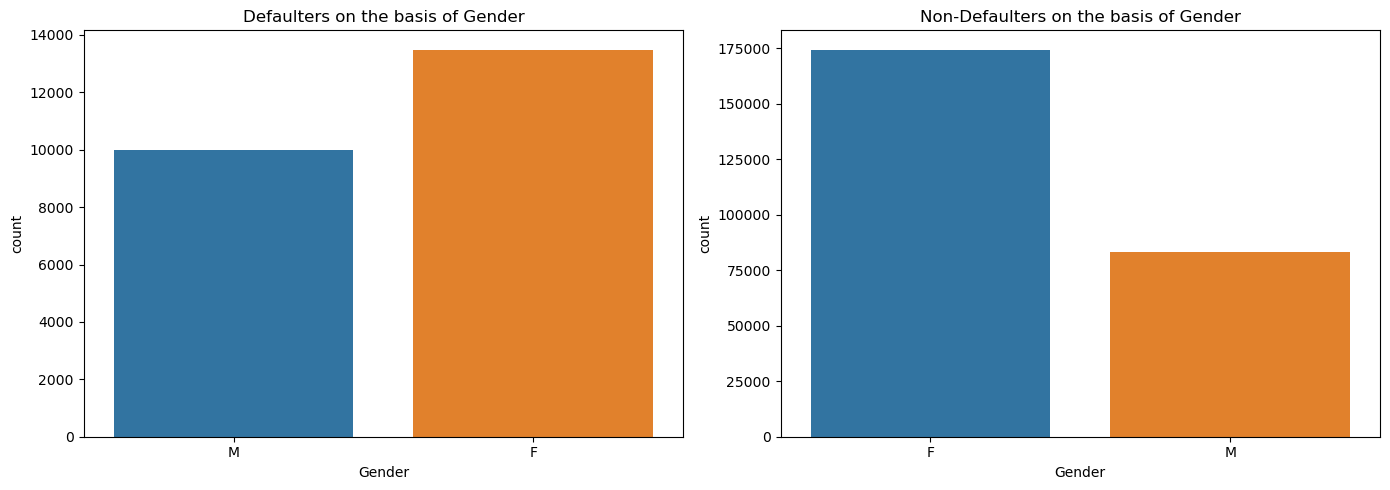

In [151]:
# Plotting two plots for defaulters and non defaulters on basis of gender
plt.figure(figsize=(14, 5))

# Plot for defaulters by gender
plt.subplot(1, 2, 1) 
ax1 = sns.countplot(x='CODE_GENDER', data=df_application_target_1)
ax1.set_title('Defaulters on the basis of Gender') 
ax1.set_xlabel('Gender') 

# Plot for non-defaulters by gender
plt.subplot(1, 2, 2)  
ax2 = sns.countplot(x='CODE_GENDER', data=df_application_target_0)
ax2.set_title('Non-Defaulters on the basis of Gender')  
ax2.set_xlabel('Gender')

plt.tight_layout() 
plt.show() 

##### Inference
For both the customers (defaulters and non-defaulters) `Female` are marginally more compared to `Male`.

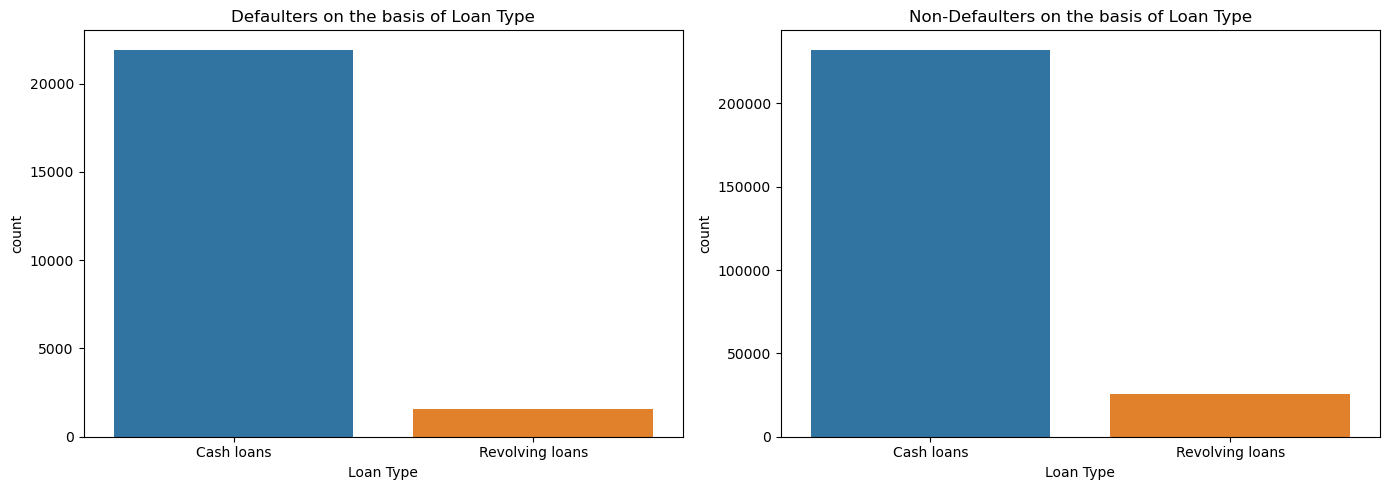

In [152]:
# Plotting two plots for defaulters and non defaulters on basis of Loan Types
plt.figure(figsize=(14, 5))

# Plotting the distribution of loan types among defaulters
plt.subplot(1, 2, 1) 
ax1 = sns.countplot(x='NAME_CONTRACT_TYPE', data=df_application_target_1)
ax1.set_title('Defaulters on the basis of Loan Type') 
ax1.set_xlabel('Loan Type') 

# Plotting the distribution of loan types among non-defaulters
plt.subplot(1, 2, 2) 
ax2 = sns.countplot(x='NAME_CONTRACT_TYPE', data=df_application_target_0)
ax2.set_title('Non-Defaulters on the basis of Loan Type') 
ax2.set_xlabel('Loan Type')  

plt.tight_layout()
plt.show() 

##### Inference
We see in both the cases `Revolving loans` are very less compared to `Cash loans`.

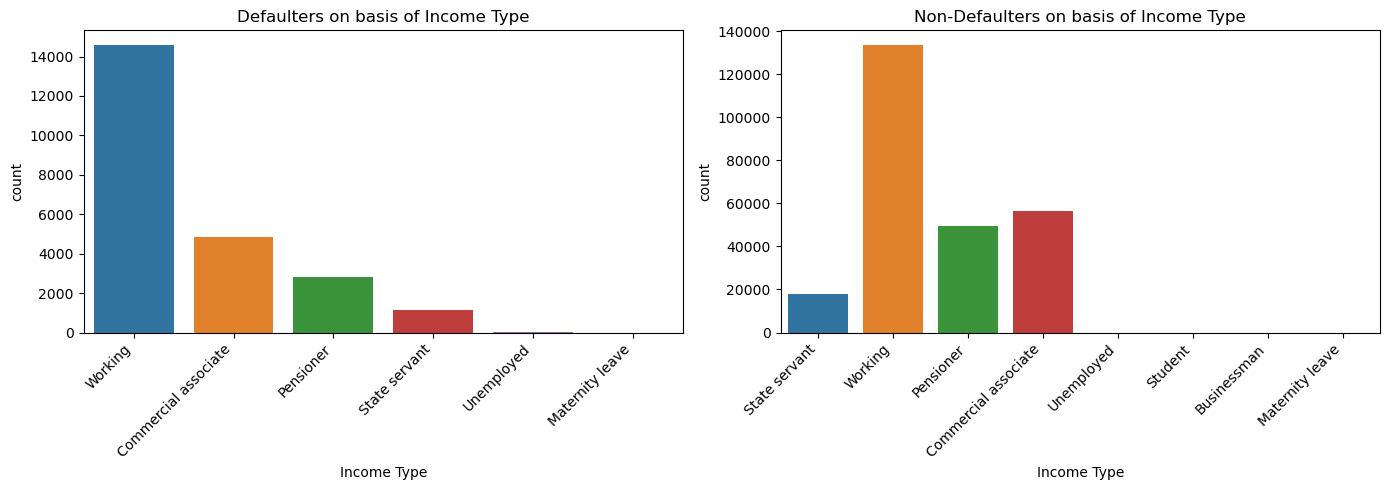

In [154]:
# Plotting two plots for defaulters and non defaulters on basis of Income Type.
plt.figure(figsize=(14, 5))

# Create a count plot for income types among defaulters
plt.subplot(1, 2, 1)  
ax1 = sns.countplot(x='NAME_INCOME_TYPE', data=df_application_target_1)
ax1.set_title('Defaulters on basis of Income Type')  
ax1.set_xlabel('Income Type') 
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')  

# Create a count plot for income types among non-defaulters
plt.subplot(1, 2, 2) 
ax2 = sns.countplot(x='NAME_INCOME_TYPE', data=df_application_target_0)
ax2.set_title('Non-Defaulters on basis of Income Type')  
ax2.set_xlabel('Income Type')  
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right') 

plt.tight_layout()
plt.show()  

#### Inference
For both the customers (defaulters and non-defaulters)`working` individuals make up the largest group.

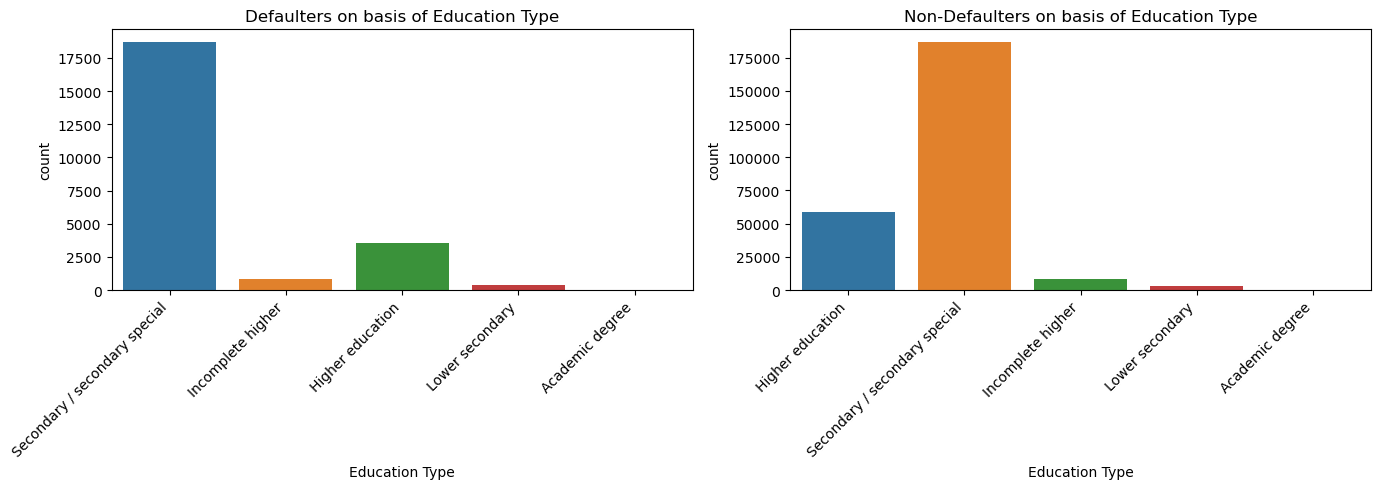

In [156]:
# Plotting two plots for defaulters and non defaulters on basis of Education Type.
plt.figure(figsize=(14, 5))

# Create a count plot for education types among defaulters
plt.subplot(1, 2, 1) 
ax1 = sns.countplot(x='NAME_EDUCATION_TYPE', data=df_application_target_1)
ax1.set_title('Defaulters on basis of Education Type') 
ax1.set_xlabel('Education Type')  
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a count plot for education types among non-defaulters
plt.subplot(1, 2, 2)  
ax2 = sns.countplot(x='NAME_EDUCATION_TYPE', data=df_application_target_0)
ax2.set_title('Non-Defaulters on basis of Education Type')  
ax2.set_xlabel('Education Type') 
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()  

##### Inference
For both the customers (defaulters and non-defaulters) `Secondary or Secondary special` education also form the largest portion.

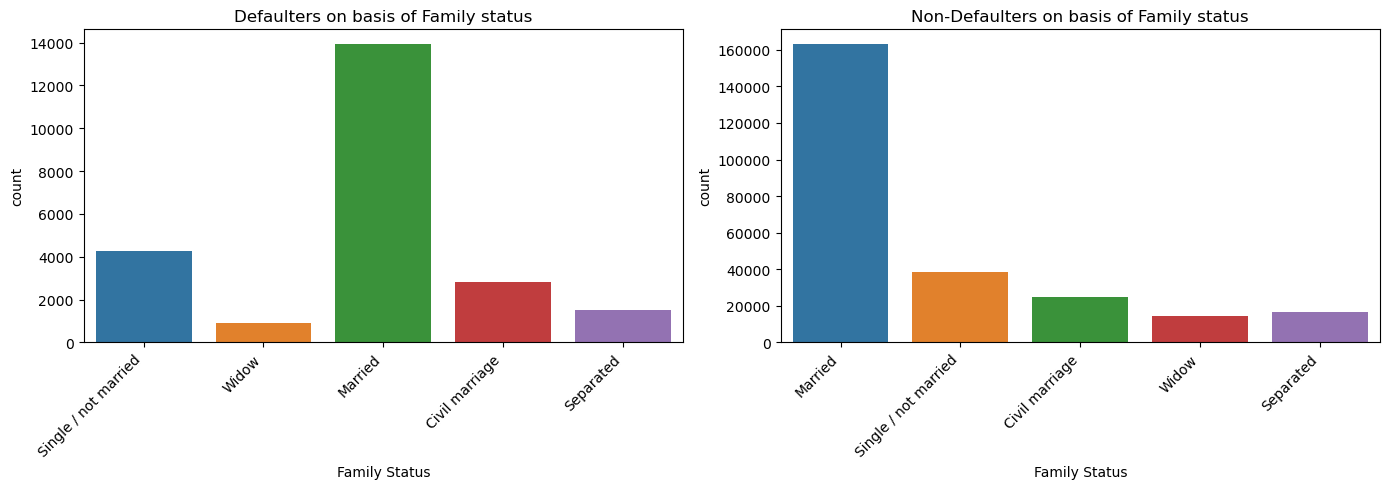

In [157]:
# Plotting two plots for defaulters and non defaulters on basis of Family status.
plt.figure(figsize=(14, 5))

# Plotting family status distribution among defaulters
plt.subplot(1, 2, 1)  
ax1 = sns.countplot(x='NAME_FAMILY_STATUS', data=df_application_target_1)
ax1.set_title('Defaulters on basis of Family status') 
ax1.set_xlabel('Family Status') 
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Plotting family status distribution among non-defaulters
plt.subplot(1, 2, 2)  
ax2 = sns.countplot(x='NAME_FAMILY_STATUS', data=df_application_target_0)
ax2.set_title('Non-Defaulters on basis of Family status') 
ax2.set_xlabel('Family Status')  
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()  
plt.show() 

##### Inference
For both the customers (defaulters and non-defaulters) married people are more in number compared to single, separated, widow etc.

### Univariate analysis for continious variables

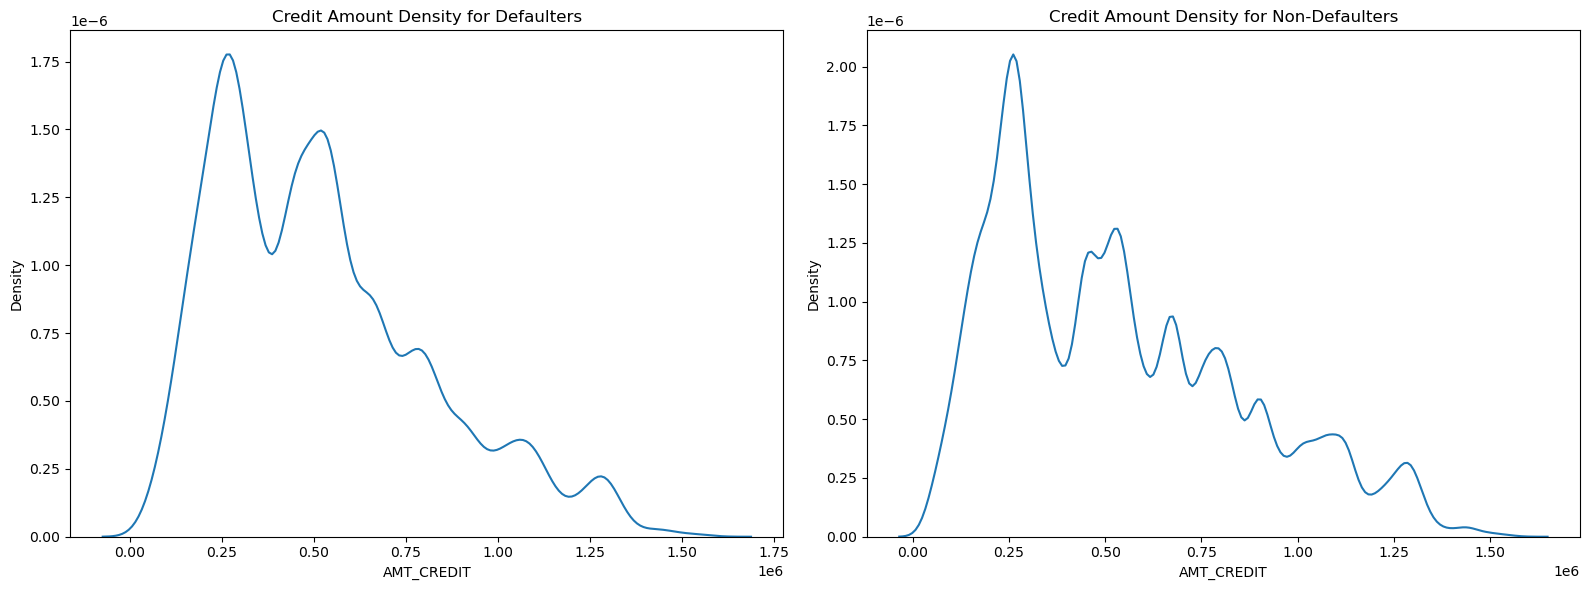

In [158]:
# Plotting two plots for defaulters and non defaulters on basis of credit amount of the loan.
plt.figure(figsize=(16, 6))

# Plot the density of 'AMT_CREDIT' for defaulters
plt.subplot(1, 2, 1)  
plt.title('Credit Amount Density for Defaulters')  
sns.kdeplot(df_application_target_1['AMT_CREDIT'])  

# Plot the density of 'AMT_CREDIT' for non-defaulters
plt.subplot(1, 2, 2) 
plt.title('Credit Amount Density for Non-Defaulters') 
sns.kdeplot(df_application_target_0['AMT_CREDIT'])

plt.tight_layout()  
plt.show()

##### Inference
1. **Defaulters** - We can notice that the lesser the credit amount of the loan, the more chances of being defaulted.
2. **Non defaulters** - If the credit amount is less, there is lesser chance of being defaulted.The chance of paying the loan decreased with increase in loan credit amount.

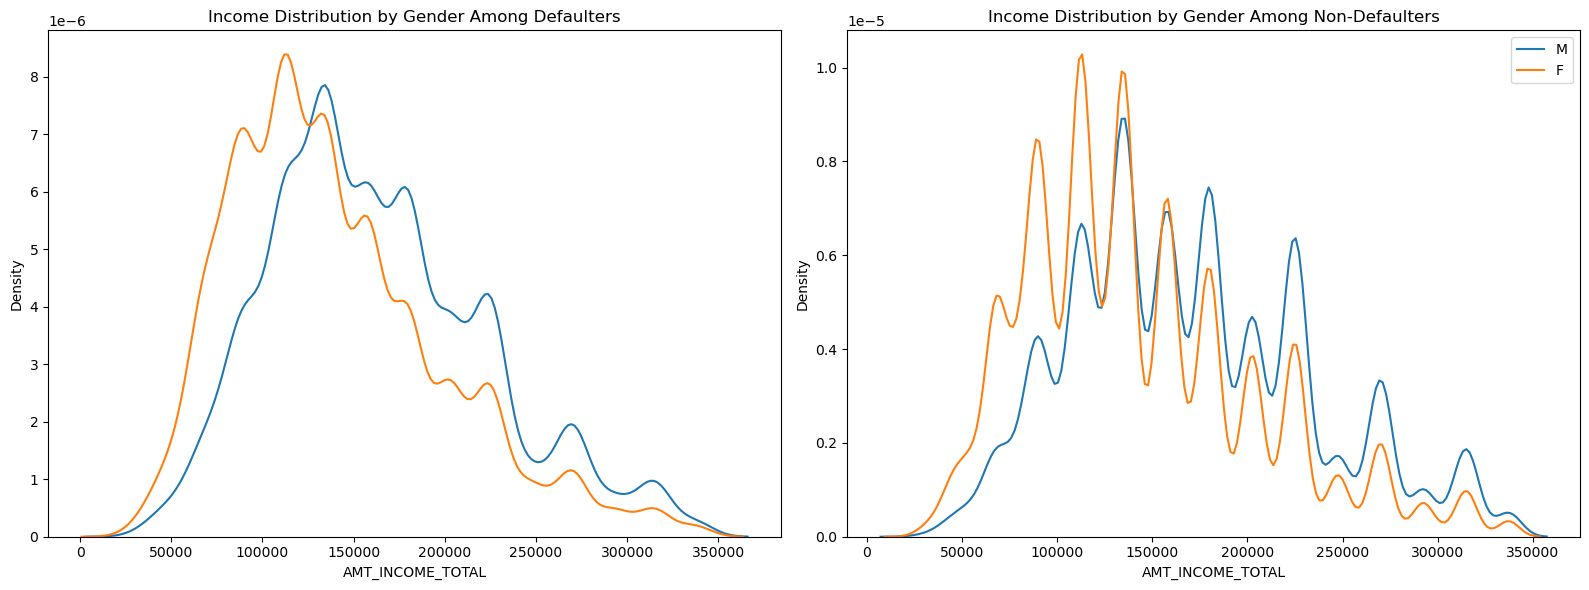

In [159]:
# Plotting two plots for defaulters and non defaulters on basis of gender and their total income
genders = ['M', 'F']

plt.figure(figsize=(16, 6))

# Plot the income distribution for defaulters by gender
plt.subplot(1, 2, 1)  
plt.title('Income Distribution by Gender Among Defaulters')
for gender in genders:
    subset = df_application_target_1[df_application_target_1['CODE_GENDER'] == gender]
    sns.kdeplot(subset['AMT_INCOME_TOTAL'], label=gender)  

# Plot the income distribution for non-defaulters by gender
plt.subplot(1, 2, 2)  
plt.title('Income Distribution by Gender Among Non-Defaulters')
for gender in genders:
    subset = df_application_target_0[df_application_target_0['CODE_GENDER'] == gender]
    sns.kdeplot(subset['AMT_INCOME_TOTAL'], label=gender)  

plt.tight_layout()  
plt.legend()
plt.show()

##### Inference
1. **Defaulters** - We can notice by looking at the pattern that chances of being a defaulter both the genders (male and female) are almost equal in all income levels. The spike of being defaulters is for income ranges 50000 to 200000.
2. **Non defaulters** - Here we see an interesting pattern. Females are more non defaulter on the lower income level but lesser non defaluter in higher income level. The spike is more for both the genders from 75000 to 150000.

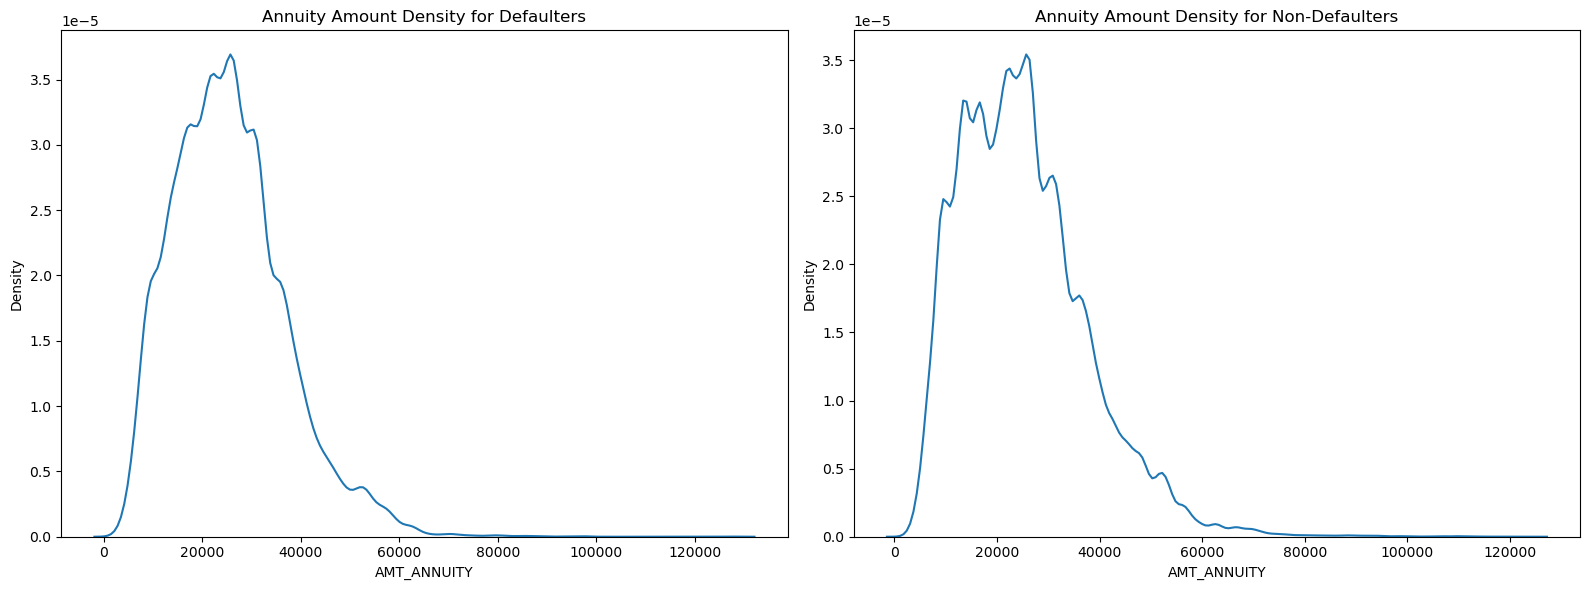

In [160]:
# Plotting two plots for defaulters and non defaulters on the basis of Loan annuity
plt.figure(figsize=(16, 6))

# Plot the density of 'AMT_ANNUITY' for defaulters
plt.subplot(1, 2, 1)  
plt.title('Annuity Amount Density for Defaulters') 
sns.kdeplot(df_application_target_1['AMT_ANNUITY']) 

# Plot the density of 'AMT_ANNUITY' for non-defaulters
plt.subplot(1, 2, 2)  
plt.title('Annuity Amount Density for Non-Defaulters') 
sns.kdeplot(df_application_target_0['AMT_ANNUITY']) 

plt.tight_layout()  
plt.show()

##### Inference
We can notice that in both the cases the loan annuity is concentrated more from 10000 to 40000. 

### Univariate analysis for ordered categorical variables

#### Age group

In [161]:
def calculate_default_and_non_default_rate(df, age_group,target):
    group_defaulters = len(df[(df['AGE_GROUP'] == age_group) & (df['TARGET'] == target)])
    group_total = len(df[df['AGE_GROUP'] == age_group])
    default_rate = round(100 * (group_defaulters / group_total), 2)
    return default_rate

In [162]:
# Calculate default rates for each age group
young_default_rate = calculate_default_and_non_default_rate(df, 'Young',1)
midage_default_rate = calculate_default_and_non_default_rate(df, 'Mid Age',1)
senior_default_rate = calculate_default_and_non_default_rate(df, 'Senior Citizen',1)

In [163]:
# Creating a dataframe of the defaulted age group percentage
agegroup_default = {'AGE_GROUP':['Young', 'Mid Age', 'Senior Citizen'], 
                    'Percentage':[young_default_rate, midage_default_rate, senior_default_rate]} 
df_agegroup_default = pd.DataFrame(agegroup_default) 
df_agegroup_default

AGE_GROUP  Percentage
0           Young       10.75
1         Mid Age        7.33
2  Senior Citizen        5.08

In [164]:
young_non_default_rate = calculate_default_and_non_default_rate(df, 'Young',0)
midage_non_default_rate = calculate_default_and_non_default_rate(df, 'Mid Age',0)
senior_non_default_rate = calculate_default_and_non_default_rate(df, 'Senior Citizen',0)

In [165]:
# Creating a dataframe of the non defaulted age group percentage
agegroup_nondefault = {'AGE_GROUP':['Young', 'Mid Age', 'Senior Citizen'],
                       'Percentage':[young_non_default_rate, midage_non_default_rate, senior_non_default_rate]} 
df_agegroup_nondefault = pd.DataFrame(agegroup_nondefault) 
df_agegroup_nondefault

AGE_GROUP  Percentage
0           Young       89.25
1         Mid Age       92.67
2  Senior Citizen       94.92

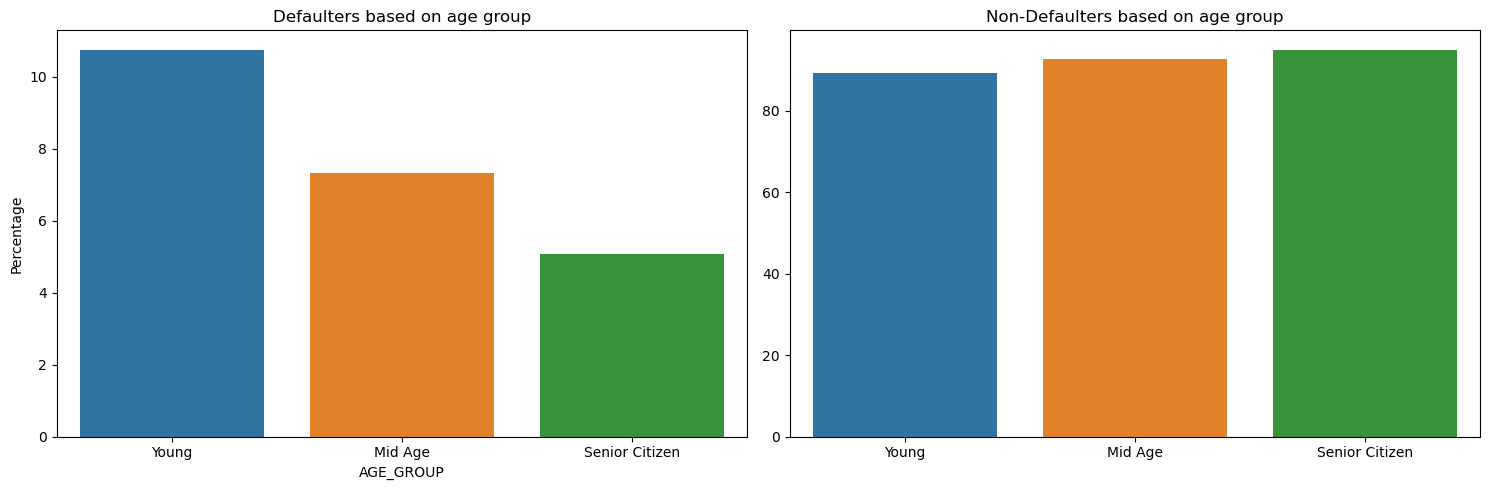

In [167]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_default)
plt.title('Defaulters based on age group')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=agegroup_nondefault)
plt.title('Non-Defaulters based on age group')

plt.tight_layout() 
plt.show()

##### Inference
1. Defaulters - We see that `Young` people are more likely to default than other two age groups. Whereas, `Senior Citizen` are less likely to default than others.
2. Non defaulters -  Nothing can be deduced based on Age group.

#### Credit amount group

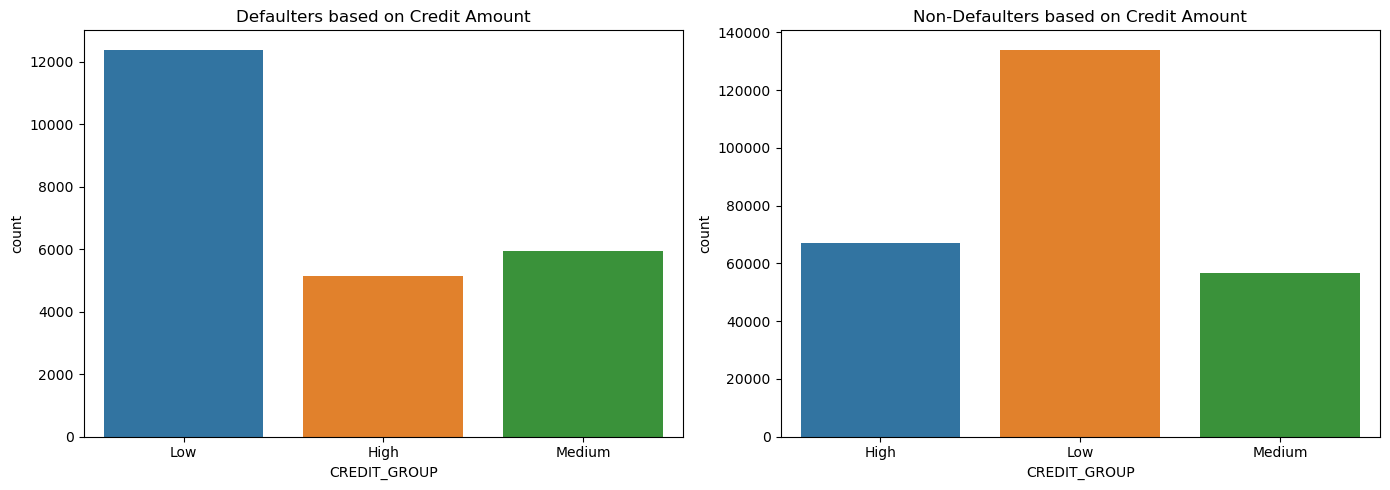

In [169]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_application_target_1)
plt.title('Defaulters based on Credit Amount')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_application_target_0)
plt.title('Non-Defaulters based on Credit Amount')
plt.tight_layout()  
plt.show()

##### Inference
1. Defaulters - `low` credited amount groups are more defaulters.
2. Non defaulters -`low` credit amount groups are more in number for not being defaulted.

#### Income group

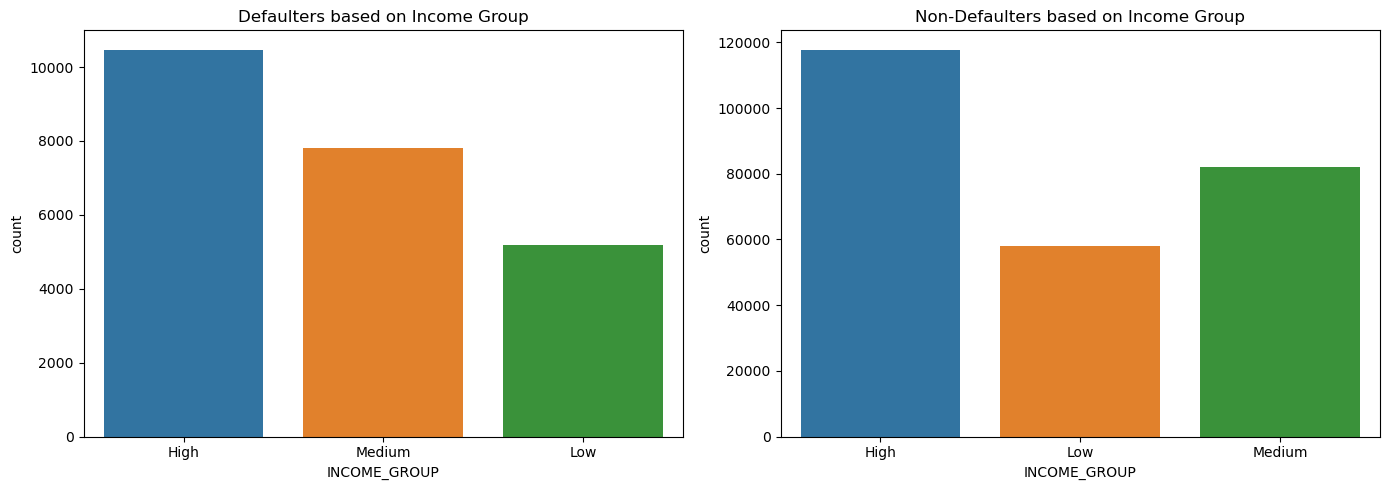

In [170]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=df_application_target_1)
plt.title('Defaulters based on Income Group')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=df_application_target_0)
plt.title('Non-Defaulters based on Income Group')
plt.tight_layout() 
plt.show()

##### Inference 
1. Defaulters - The `High` income group is more in number to be defaulted, than Medium and then Low.
2. Non defaulters - non defaulters more in `High` income group and less in low income group.

#### Normalized score from external data source

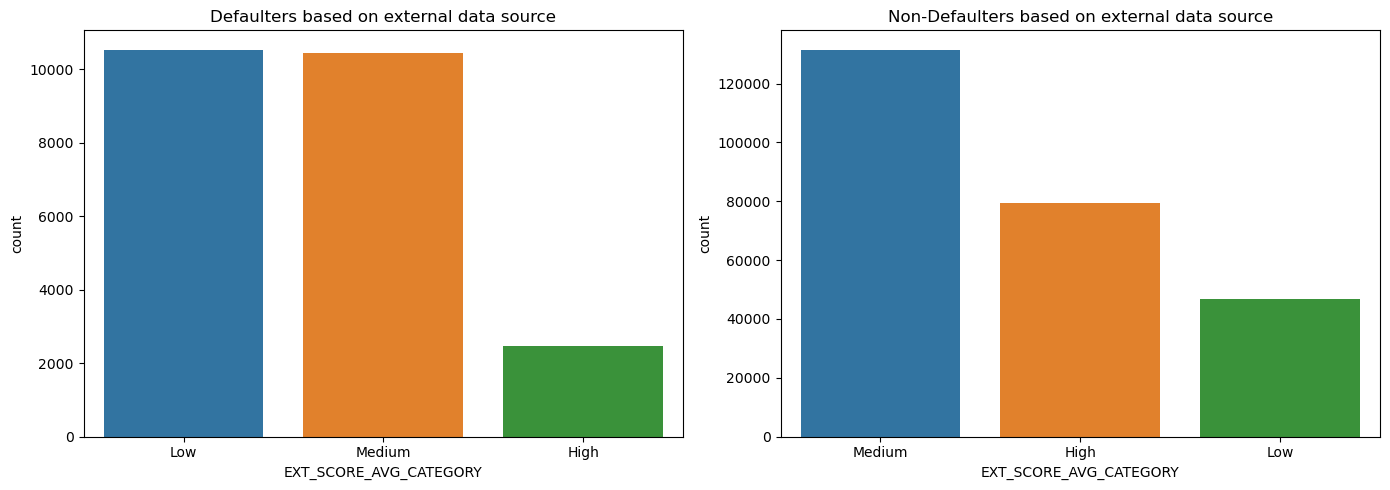

In [173]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'EXT_SCORE_AVG_CATEGORY',data=df_application_target_1)
plt.title('Defaulters based on external data source')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'EXT_SCORE_AVG_CATEGORY',data=df_application_target_0)
plt.title('Non-Defaulters based on external data source')
plt.tight_layout()  
plt.show()

##### Inference
1. Defaulters- The `medium` scorer as well as `low` scorer both are equally likely to default.
2. Non defaulters - `Medium` scorers are more non defaulted than `High` scorer. As expected the `Low` scorers are lesser in number.

## Bivariate analysis

#### Corelation of relevant numerical columns for defaulters and non defaulters

In [176]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_AVG_SCORE']

##### Corelation of defaulters 

In [177]:
# Creating dataframe for numerical columns
df_corr_target_1 = df_application_target_1[corr_cols]
df_corr_target_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
0           202500.0    406597.5      24700.5         351000.0   26   
26          112500.0    979992.0      27076.5         702000.0   52   
40          202500.0   1193580.0      35028.0         855000.0   48   
42          135000.0    288873.0      16258.5         238500.0   37   
81           81000.0    252000.0      14593.5         252000.0   68   

    EXT_SOURCE_AVG_SCORE  
0                   0.20  
26                  0.37  
40                  0.31  
42                  0.54  
81                  0.37

In [178]:
# Corelation matrix
df_corr_target_1.corr() 

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL              1.000000    0.310370     0.395549   
AMT_CREDIT                    0.310370    1.000000     0.725723   
AMT_ANNUITY                   0.395549    0.725723     1.000000   
AMT_GOODS_PRICE               0.312102    0.978455     0.728208   
AGE                          -0.017492    0.131158    -0.004642   
EXT_SOURCE_AVG_SCORE          0.035995    0.103843     0.088601   

                      AMT_GOODS_PRICE       AGE  EXT_SOURCE_AVG_SCORE  
AMT_INCOME_TOTAL             0.312102 -0.017492              0.035995  
AMT_CREDIT                   0.978455  0.131158              0.103843  
AMT_ANNUITY                  0.728208 -0.004642              0.088601  
AMT_GOODS_PRICE              1.000000  0.132303              0.113005  
AGE                          0.132303  1.000000              0.165162  
EXT_SOURCE_AVG_SCORE         0.113005  0.165162              1.000000

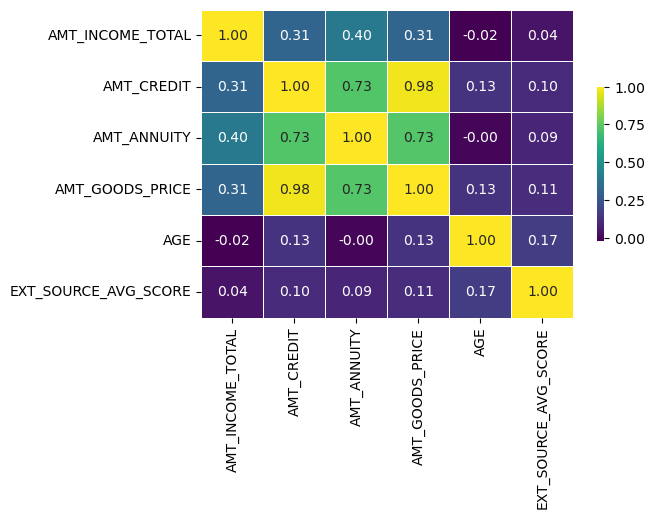

In [194]:
plt.figure(figsize=(6, 4))

# Compute the correlation matrix for the dataframe 'df_corr_target_1'
correlation_matrix = df_corr_target_1.corr()

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(
    correlation_matrix,      
    cmap="viridis",          
    annot=True,             
    fmt=".2f",              
    linewidths=.5,          
    cbar_kws={"shrink": .5} 
)

# Show the plot
plt.show()

**Highly corelate columns for defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.73)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.73)

##### Corelation of non defaulters 

In [195]:
# Creating dataframe for numerical columns
df_corr_target_0 = df_application_target_0[corr_cols]
df_corr_target_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
1          270000.0   1293502.5      35698.5        1129500.0   46   
2           67500.0    135000.0       6750.0         135000.0   53   
3          135000.0    312682.5      29686.5         297000.0   53   
4          121500.0    513000.0      21865.5         513000.0   55   
5           99000.0    490495.5      27517.5         454500.0   47   

   EXT_SOURCE_AVG_SCORE  
1                  0.57  
2                  0.64  
3                  0.58  
4                  0.42  
5                  0.49

In [196]:
# Corelation matrix
df_corr_target_0.corr() 

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL              1.000000    0.336036     0.418942   
AMT_CREDIT                    0.336036    1.000000     0.737380   
AMT_ANNUITY                   0.418942    0.737380     1.000000   
AMT_GOODS_PRICE               0.340411    0.982395     0.743272   
AGE                          -0.099795    0.046426    -0.024138   
EXT_SOURCE_AVG_SCORE          0.045902    0.079254     0.076128   

                      AMT_GOODS_PRICE       AGE  EXT_SOURCE_AVG_SCORE  
AMT_INCOME_TOTAL             0.340411 -0.099795              0.045902  
AMT_CREDIT                   0.982395  0.046426              0.079254  
AMT_ANNUITY                  0.743272 -0.024138              0.076128  
AMT_GOODS_PRICE              1.000000  0.044684              0.086885  
AGE                          0.044684  1.000000              0.172800  
EXT_SOURCE_AVG_SCORE         0.086885  0.172800              1.000000

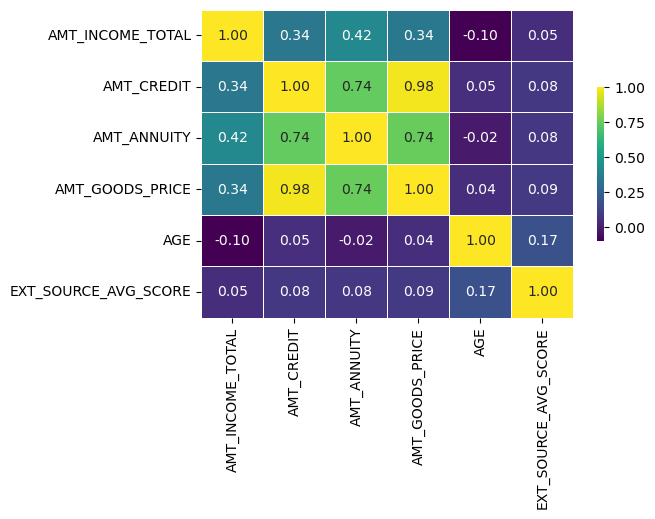

In [197]:
plt.figure(figsize=(6, 4))

# Compute the correlation matrix for the dataframe 'df_corr_target_1'
correlation_matrix = df_corr_target_0.corr()

# Generate a heatmap to visualize the correlation matrix
sns.heatmap(
    correlation_matrix,      
    cmap="viridis",          
    annot=True,            
    fmt=".2f",              
    linewidths=.5,          
    cbar_kws={"shrink": .5} 
)

# Show the plot
plt.show()

**Highly corelate columns for non defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.74)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

**Conclusion** - 
We can see that for both defaulters and non defaulters the same pairs of columns are highly corelated.

### Bivariate analysis on continuous variable

#### Credit amount of the loan on the basis of client income for both male and female

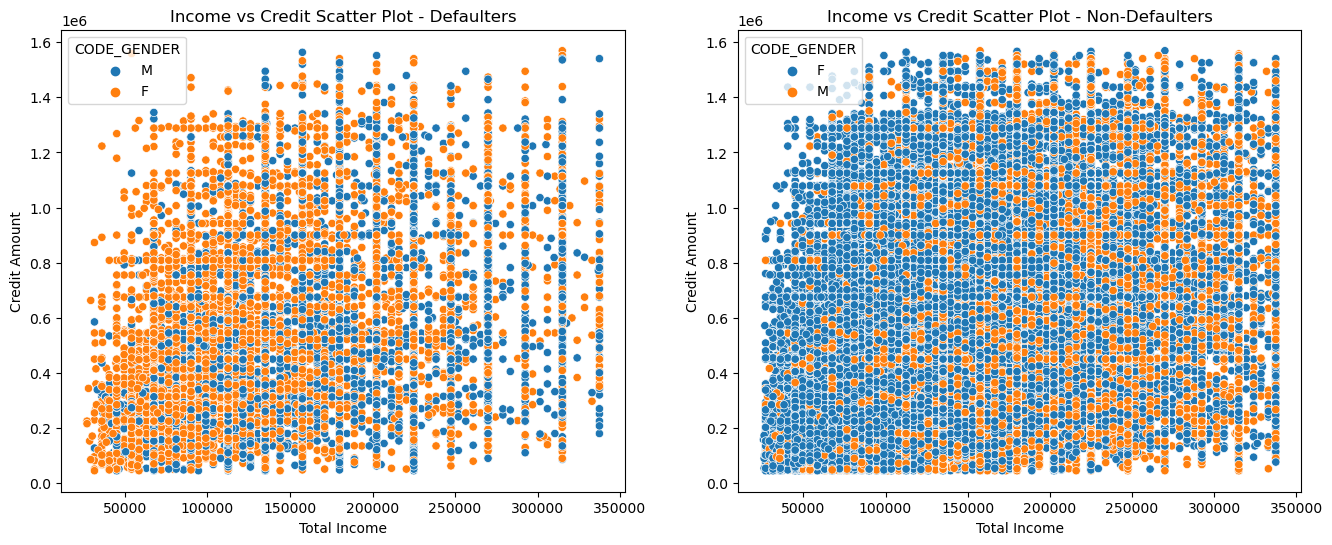

In [198]:
# Set up a figure with a specified size
plt.figure(figsize=(16, 6))

# Create a scatter plot for defaulters
plt.subplot(1, 2, 1)  
ax1 = sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='CODE_GENDER', data=df_application_target_1)
ax1.set_title('Income vs Credit Scatter Plot - Defaulters')  
ax1.set_xlabel('Total Income')  
ax1.set_ylabel('Credit Amount')  

# Create a scatter plot for non-defaulters
plt.subplot(1, 2, 2)  
ax2 = sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='CODE_GENDER', data=df_application_target_0)
ax2.set_title('Income vs Credit Scatter Plot - Non-Defaulters')  
ax2.set_xlabel('Total Income')  
ax2.set_ylabel('Credit Amount')  

# Display the plots
plt.show()

##### Inference
1. Defaulters - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan especially for female. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.
2. Non defaulters - We can hardly figure out any pattern out of this.

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

In [200]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP','EXT_SCORE_AVG_CATEGORY']

#### Defaulters

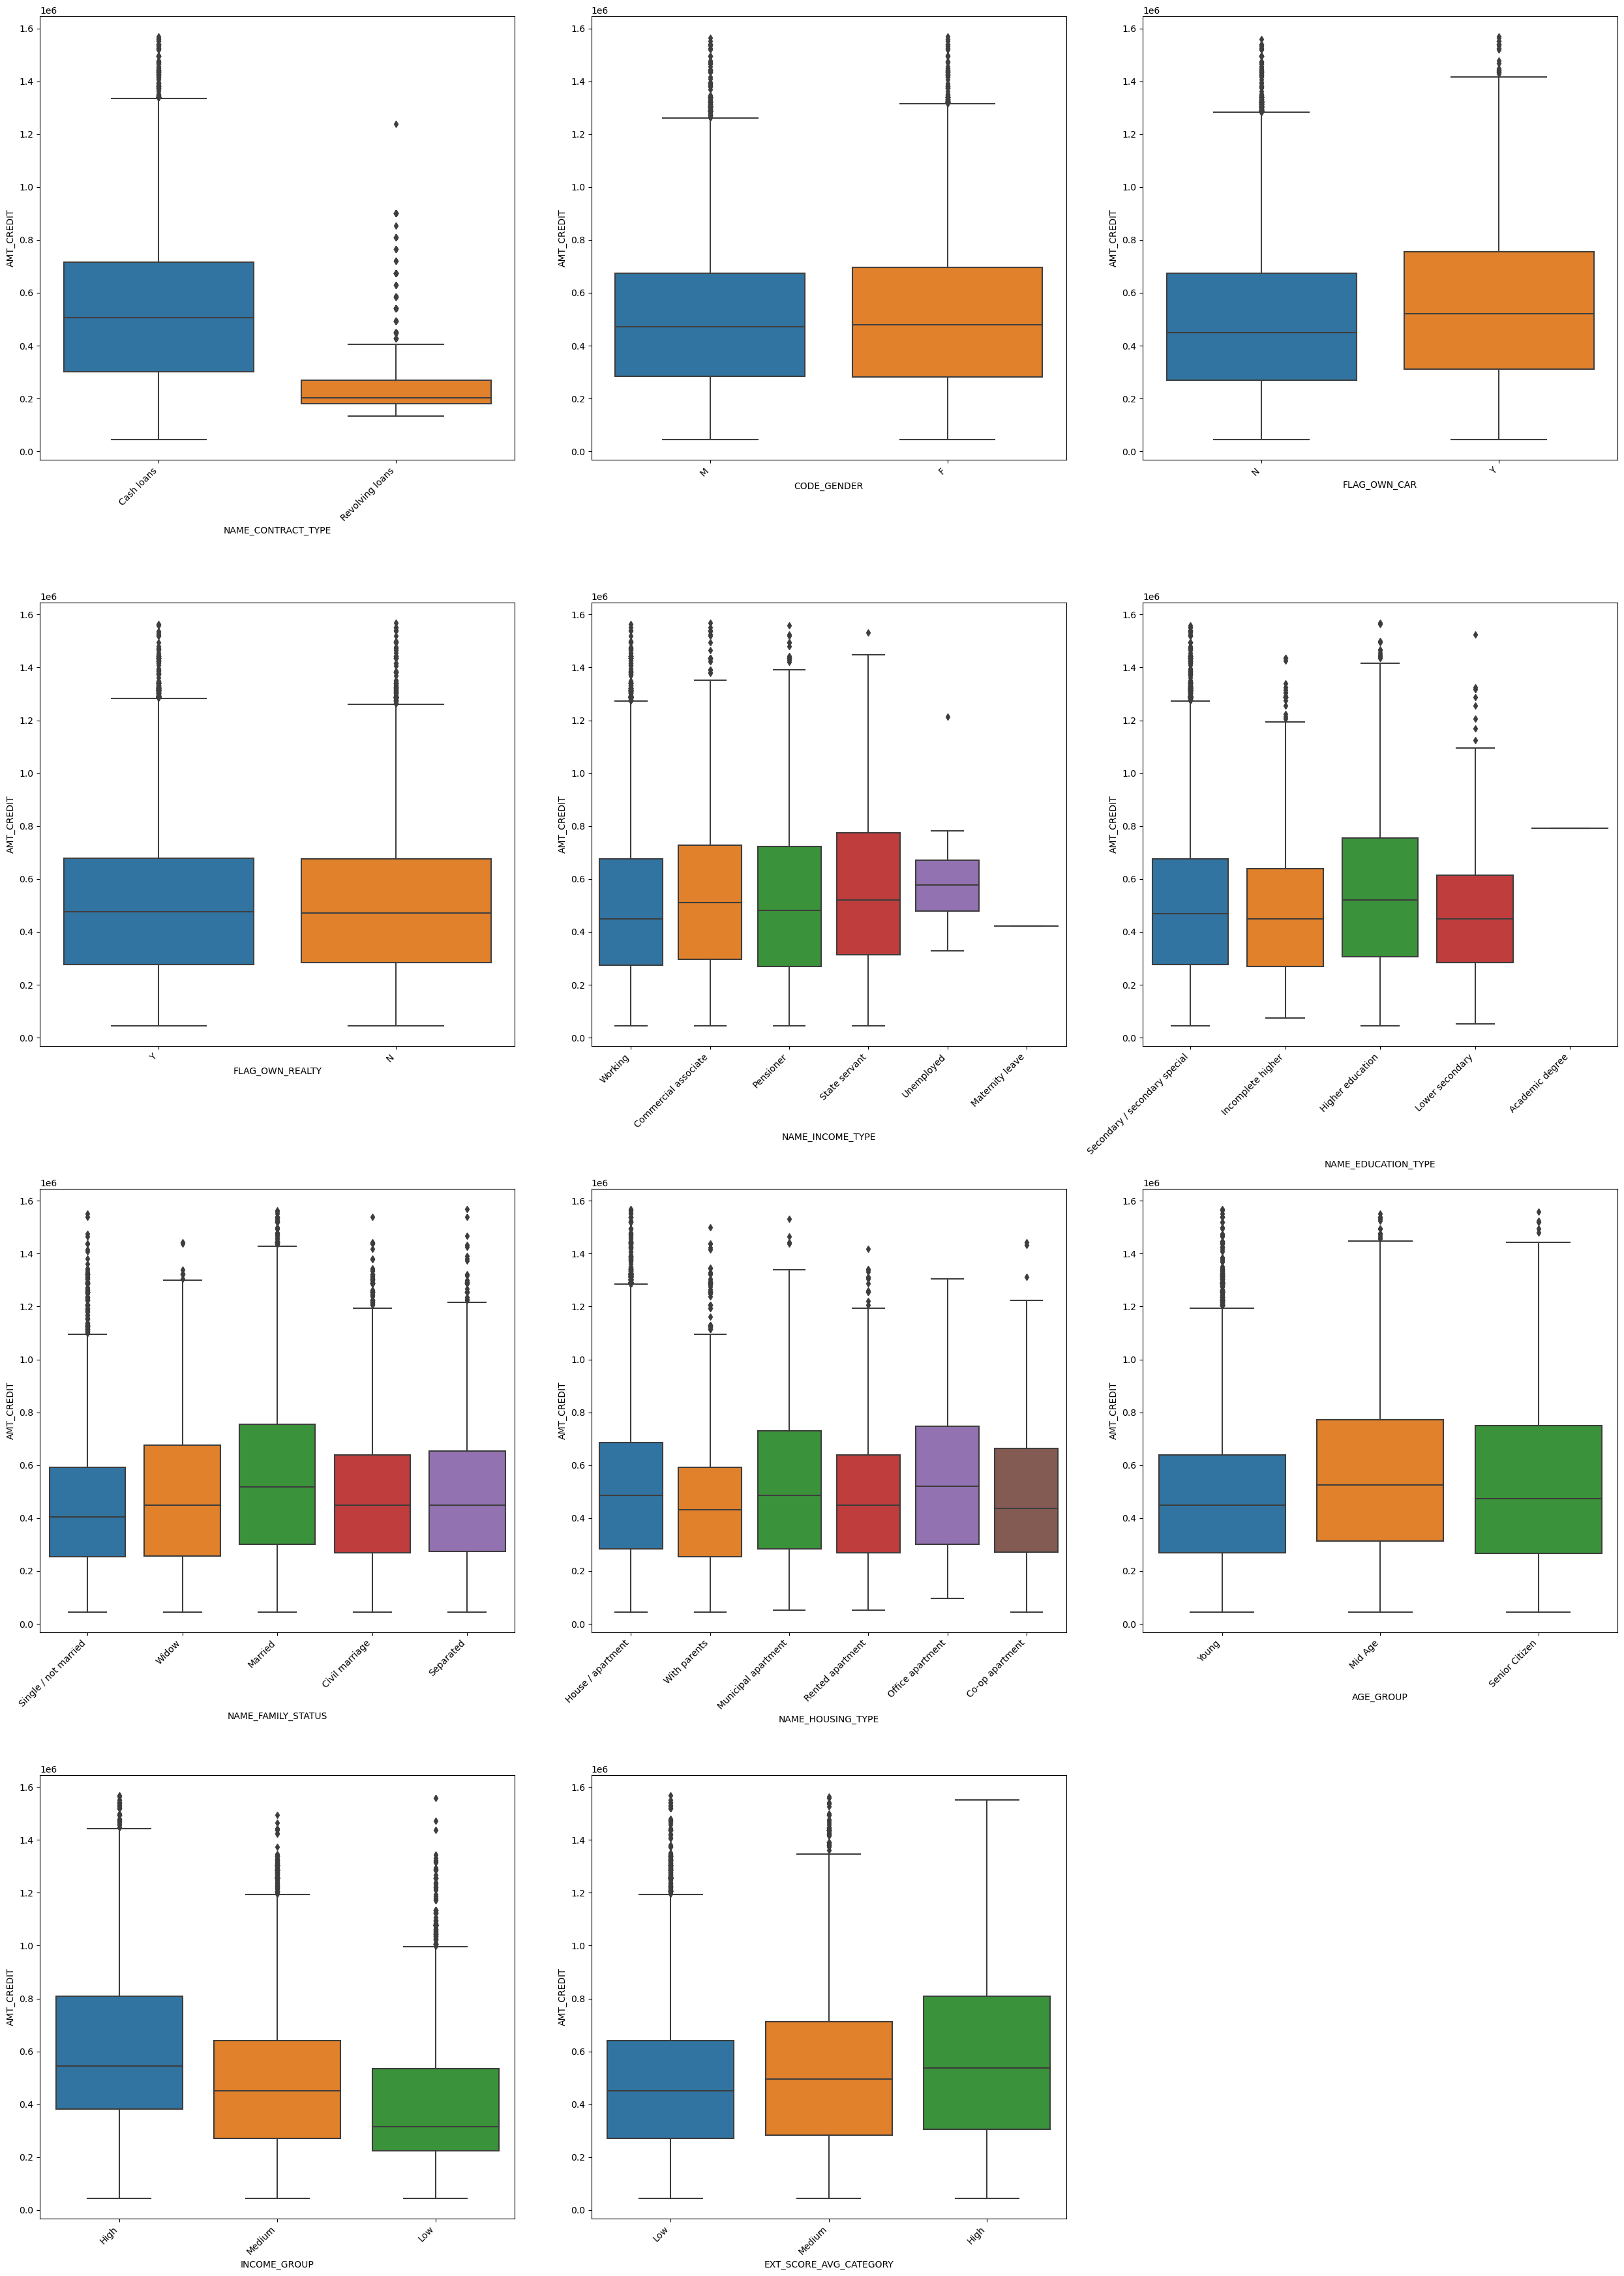

In [203]:
plt.figure(figsize=(25, 35))
subplot_counter = 0

# Loop over each category to create a box plot
for category in categories:
    subplot_counter += 1
    
    ax = plt.subplot(4, 3, subplot_counter)
    sns.boxplot(x=category, y='AMT_CREDIT', data=df_application_target_1)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the final plots
plt.tight_layout()  
plt.show()

##### Inference
1. Credit amount of the loans are very low for `Revolving loans`
2. There is no credit amount differnce between genders, client owning cars or realty.
3. The Young age group got less amount of loan credited cmpared to mid age and senior citizen.
4. Higher income group have more loan amount credited.
5. Clients having higher external score have more loan amount.

#### Non-defaulters

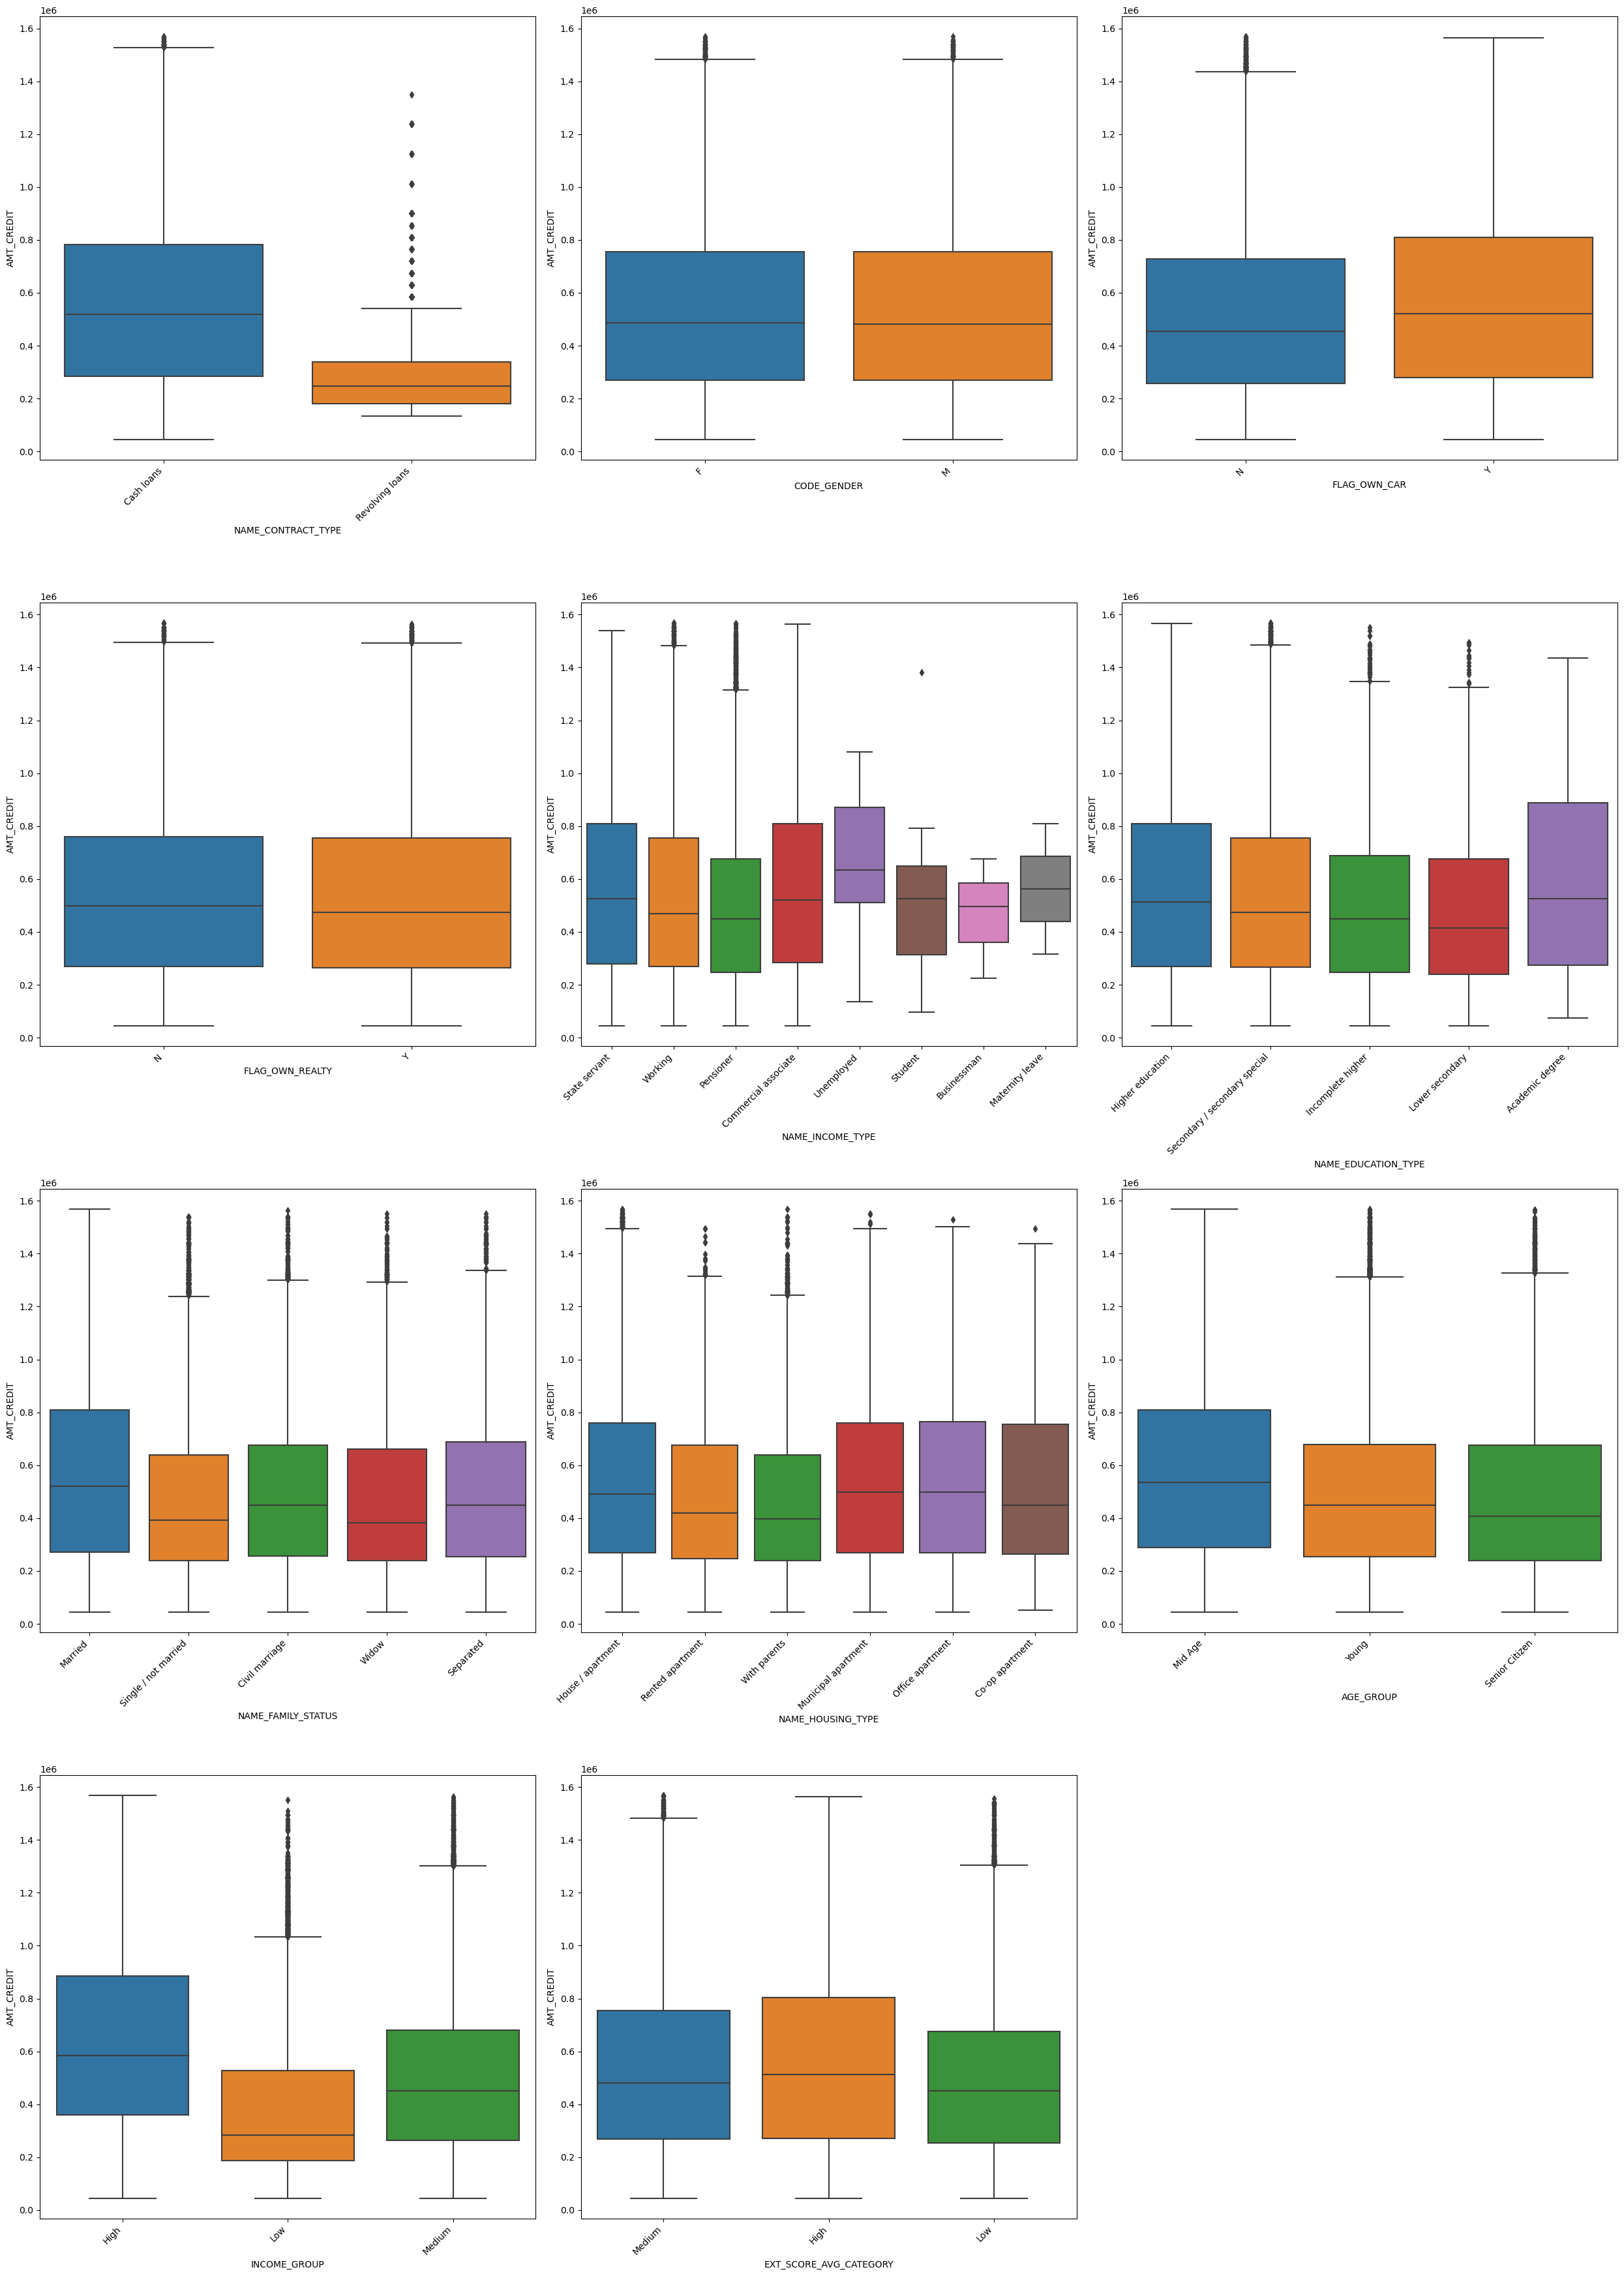

In [204]:
plt.figure(figsize=(25, 35))
plot_number = 0

# Loop through each category and create a box plot
for category in categories:
    plot_number += 1  
    ax = plt.subplot(4, 3, plot_number)  
    sns.boxplot(x=category, y='AMT_CREDIT', data=df_application_target_0)  
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust the layout to prevent overlapping of plots
plt.tight_layout()
plt.show()

##### Inference
1. Credit amount of the loans are very low for `Revolving loans`
3. The mid age group got more amount of loan credited compared to young and senior citizen.
4. Higher income group have more loan amount credited and lower the lowest.
5. Clients having higher external score have more loan amount.
6. Surprisingly the `unemployed` people have spike in credit amount of loan
7. The `Married` people have more loan amount credited.

### Analysis of two segmented variables 

 #### Income group and gender

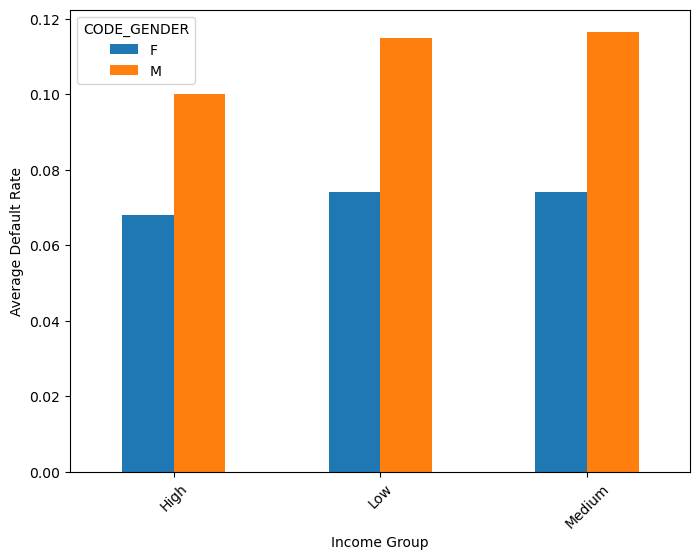

In [206]:
# A pivot table with the mean 'TARGET' values for each 'INCOME_GROUP' and 'CODE_GENDER'
pivot_table = df.pivot_table(values='TARGET', index='INCOME_GROUP', columns='CODE_GENDER', aggfunc='mean')
pivot_table.plot.bar(figsize=(8, 6), rot=45)

plt.xlabel('Income Group') 
plt.ylabel('Average Default Rate')  

plt.show()

##### Inference
We can see that `Males` are more likely defaulted than `Females` across all income groups.

#### Education and gender

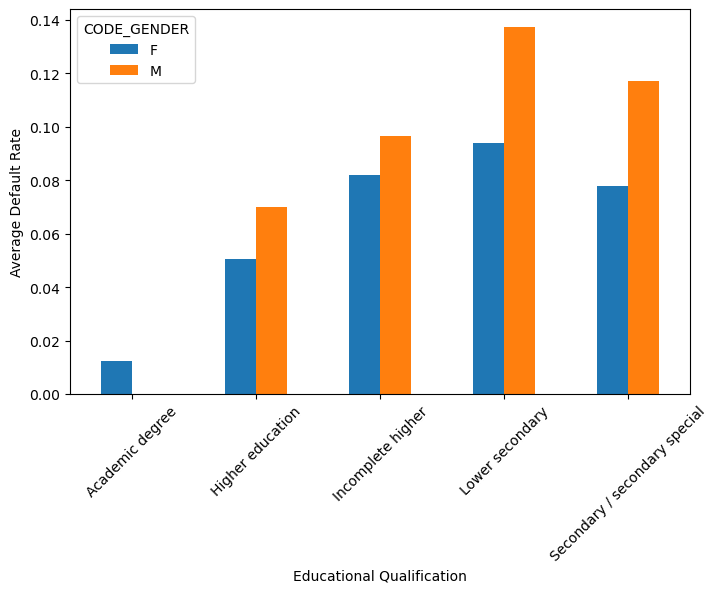

In [207]:
# Pivot table with the mean 'TARGET' values for each 'NAME_EDUCATION_TYPE' and 'CODE_GENDER'
education_gender_pivot = df.pivot_table(values='TARGET', index='NAME_EDUCATION_TYPE', columns='CODE_GENDER', aggfunc='mean')

# Plot a bar chart using the pivot table data
education_gender_pivot.plot.bar(figsize=(8, 5),  rot=45)

plt.xlabel('Educational Qualification') 
plt.ylabel('Average Default Rate')       

plt.show()

##### Inference
1. `Lower secondary` educated clients are more defaulted followed by `Secondary` and `Incomplete higher` educated clients.
2. The `Higher` educated people are less defaulted.
3. Accross all educated level `Females` are less defaulted than male.

 #### Credit amount group and Income group

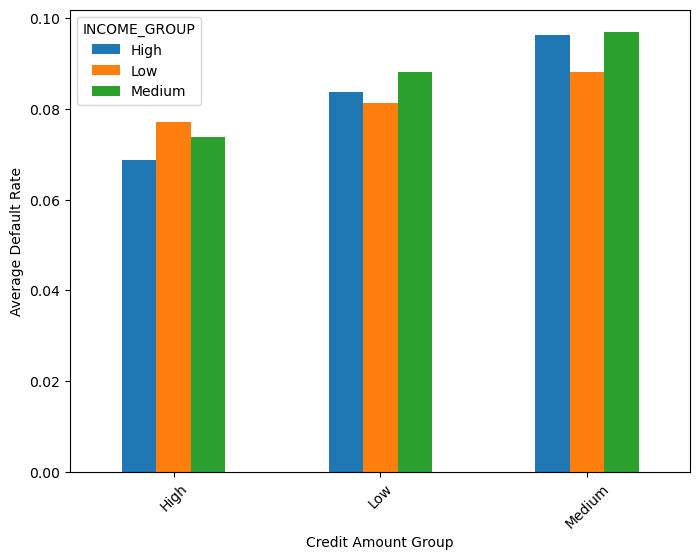

In [208]:
# Pivot table with the mean of 'TARGET' for each 'CREDIT_GROUP' across 'INCOME_GROUP'
credit_income_pivot = df.pivot_table(values='TARGET', index='CREDIT_GROUP', columns='INCOME_GROUP', aggfunc='mean')
credit_income_pivot.plot.bar(figsize=(8, 6),rot=45)

plt.xlabel('Credit Amount Group')
plt.ylabel('Average Default Rate')

plt.show()

##### Inference
1. Medium credit amount group are highly defaulted in all income groups.
2. High credit amount groups are less likely to default in all income groups.

#### Credit amount group and Age group

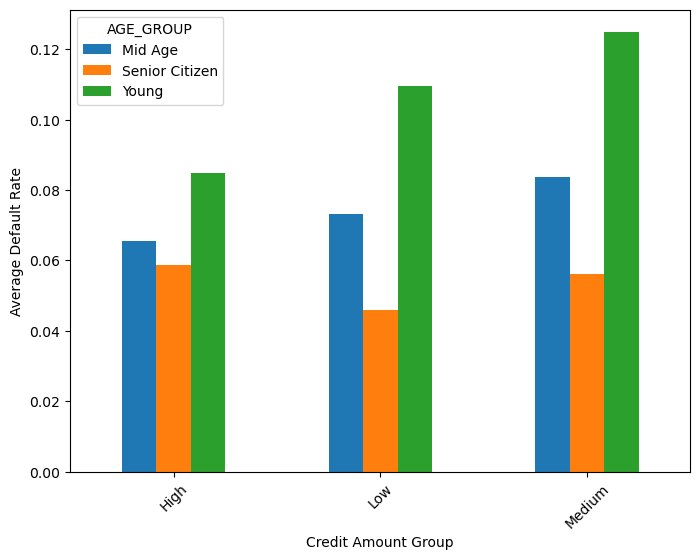

In [209]:
# Pivot table with the mean 'TARGET' for each 'CREDIT_GROUP' within each 'AGE_GROUP'
credit_age_pivot = df.pivot_table(values='TARGET', index='CREDIT_GROUP', columns='AGE_GROUP', aggfunc='mean')


credit_age_pivot.plot.bar(figsize=(8, 6),  rot=45)
plt.xlabel('Credit Amount Group')
plt.ylabel('Average Default Rate')

plt.show()

##### Inference
1. Young clients with medium and low credit amount group are highly defaulted.
2. Senior citizens across all credit amount groups are less likely defaulted.

#### Age group and Income group

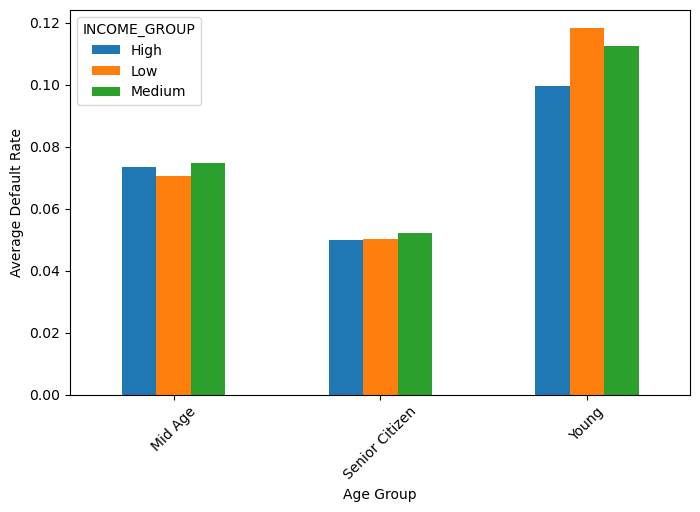

In [210]:
# Generate a pivot table with the mean default rate ('TARGET') for each 'AGE_GROUP' and 'INCOME_GROUP'
age_income_default_pivot = df.pivot_table(values='TARGET', index='AGE_GROUP', columns='INCOME_GROUP', aggfunc='mean')

# Create a bar plot from the pivot table data
age_income_default_pivot.plot.bar(figsize=(8, 5),rot=45)

plt.xlabel('Age Group')
plt.ylabel('Average Default Rate')

plt.show()

##### Inference
1. `Young` clients are more defaulted than Mid age and senior.
2. Young low income people are more defaulted.
3. For Mid age and senior people the default rate is almost same in all income group.

#### Profession and Gender

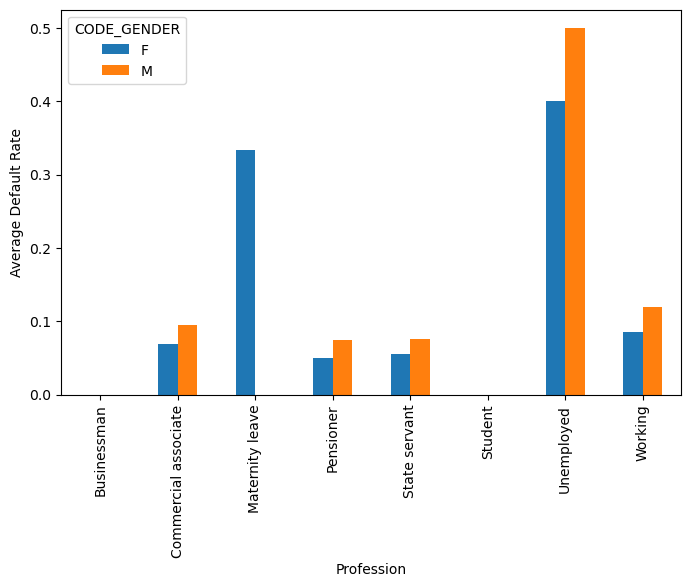

In [211]:
# Pivot table with the mean 'TARGET' values for each profession by gender
income_gender_default_pivot = df.pivot_table(values='TARGET', 
                                             index='NAME_INCOME_TYPE', 
                                             columns='CODE_GENDER', 
                                             aggfunc='mean')
income_gender_default_pivot.plot.bar(figsize=(8, 5),rot=90)         
plt.xlabel('Profession')
plt.ylabel('Average Default Rate')

plt.show()

##### Inference
1. No surprise the unemployed clients are more defaulted.
2. Clients with maternity leave are expected to be defaulted more.
3. The default rate is lesser in all other professions.
4. Males are more defaulted with their respective professions compared to females.

#### Family status and age group

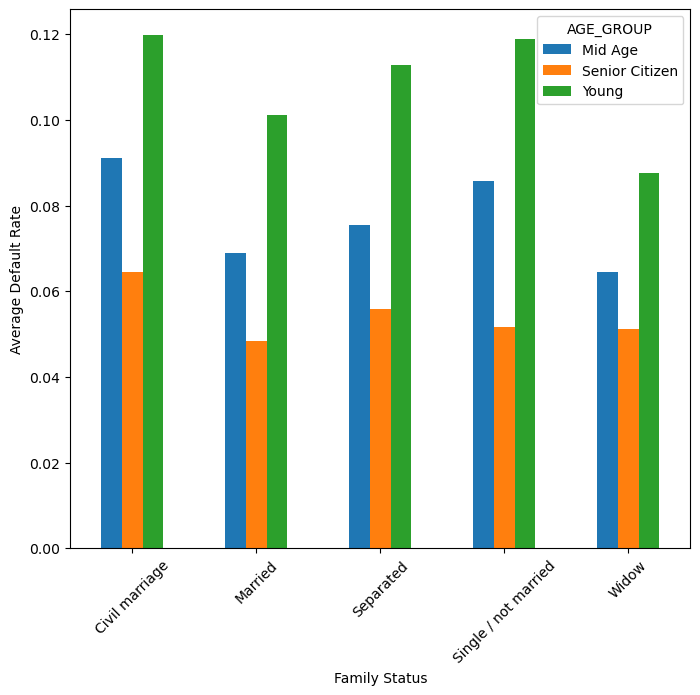

In [212]:
# Pivot table with the mean 'TARGET' values for each family status by age group
family_status_age_default_pivot = df.pivot_table(values='TARGET',
                                                 index='NAME_FAMILY_STATUS',
                                                 columns='AGE_GROUP',
                                                 aggfunc='mean')

family_status_age_default_pivot.plot.bar(figsize=(8, 7),rot=45)
plt.xlabel('Family Status')
plt.ylabel('Average Default Rate')

plt.show()

##### Inference
Across all family status the `Young` clients are more defaulted and `Senior citizen` are less.

#### Family status and gender

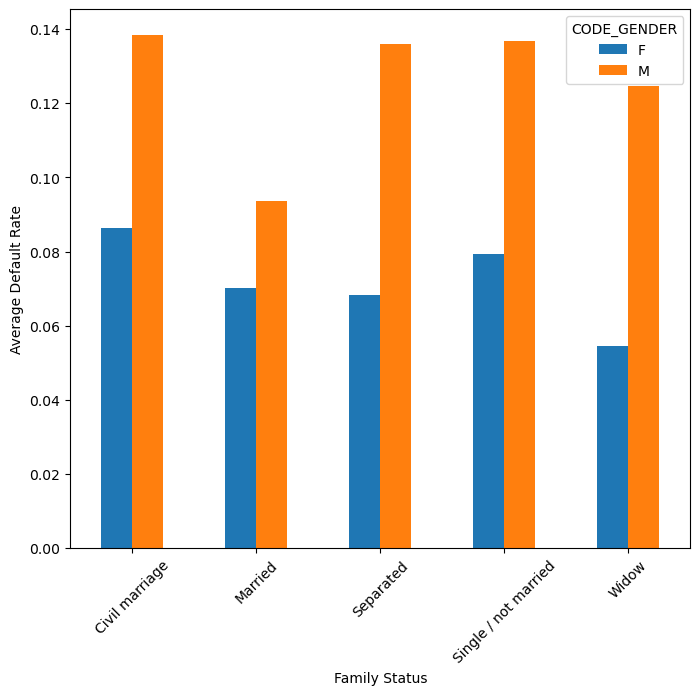

In [213]:
# Pivot table with the mean 'TARGET' values for each 'NAME_FAMILY_STATUS' and 'CODE_GENDER'
gender_family_status_default_rate = df.pivot_table(values='TARGET', 
                                                   index='NAME_FAMILY_STATUS', 
                                                   columns='CODE_GENDER', 
                                                   aggfunc='mean')
gender_family_status_default_rate.plot.bar(figsize=(8, 7), rot=45 )     

plt.xlabel('Family Status')
plt.ylabel('Average Default Rate')

plt.show()

##### Inference
Across all family status the `Male` clients are more defaulted than `Female`.

# Previous application

In [214]:
df_previous = pd.read_csv('previous_application.csv')
df_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [215]:
df_previous.shape

(1670214, 37)

#### Handling missing values in columns

**Replacing all the XNA and XAP to NaN**

In [216]:
df_previous.replace('XNA',np.nan,inplace=True)
df_previous.replace('XAP',np.nan,inplace=True)

In [217]:
# List the columns having more than 30% missing values
missing_value_percentages_previous  = df_previous.isnull().mean()
columns_with_high_missing_values_previous = missing_value_percentages_previous [missing_value_percentages_previous  >= 0.3].index.tolist()
num_columns_high_missing_previous  = len(columns_with_high_missing_values_previous )
num_columns_high_missing_previous 

18

In [218]:
# Delete the columns having more than 30% missing values
df_previous = df_previous.drop(columns_with_high_missing_values_previous,axis=1)

##### List and delete the columns, which are not much relevant for the analysis

In [219]:
# Delete the columns which are irrelevant for the analysis
df_previous = df_previous.drop(['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START'],axis=1)

In [220]:
df_previous.shape

(1670214, 15)

#### Treating Missing Values in Rows

In [221]:
# Percent of missing values in columns
(round(100*(df_previous.isnull().sum()/len(df_previous.index)),2))

SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_TYPE       0.02
AMT_ANNUITY             22.29
AMT_APPLICATION          0.00
AMT_CREDIT               0.00
AMT_GOODS_PRICE         23.08
NAME_CONTRACT_STATUS     0.00
DAYS_DECISION            0.00
NAME_CLIENT_TYPE         0.12
NAME_PORTFOLIO          22.29
CHANNEL_TYPE             0.00
SELLERPLACE_AREA         0.00
CNT_PAYMENT             22.29
PRODUCT_COMBINATION      0.02
dtype: float64

In [223]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
missing_values_count = df_previous[df_previous['AMT_ANNUITY'].isna() & df_previous['CNT_PAYMENT'].isna() & df_previous['AMT_GOODS_PRICE'].isna()].shape[0]
missing_values_count

333855

As there are only 333855 such records we can delete those.
Note:- As we have total 1670214 records deleting only 333855 records will not much affect our further analysis.
It is better to delete such rows instead of imputing values and making the analysis biased.

In [224]:
df_previous = df_previous[(~(np.isnan(df_previous['AMT_ANNUITY']) & np.isnan(df_previous['AMT_GOODS_PRICE']) & np.isnan(df_previous['CNT_PAYMENT'])))]

In [225]:
df_previous.shape

(1336359, 15)

In [227]:
(round(100*(df_previous.isnull().sum()/len(df_previous.index)),3))

SK_ID_PREV              0.000
SK_ID_CURR              0.000
NAME_CONTRACT_TYPE      0.000
AMT_ANNUITY             2.872
AMT_APPLICATION         0.000
AMT_CREDIT              0.000
AMT_GOODS_PRICE         3.866
NAME_CONTRACT_STATUS    0.000
DAYS_DECISION           0.000
NAME_CLIENT_TYPE        0.070
NAME_PORTFOLIO          2.872
CHANNEL_TYPE            0.000
SELLERPLACE_AREA        0.000
CNT_PAYMENT             2.872
PRODUCT_COMBINATION     0.000
dtype: float64

In [228]:
# Count the rows for which AMT_ANNUITY is empty
len(df_previous[np.isnan(df_previous['AMT_ANNUITY'])])

38380

In [229]:
# As there are only 38380 rows we can delete those records
df_previous = df_previous[~(np.isnan(df_previous['AMT_ANNUITY']))]

In [230]:
df_previous.shape

(1297979, 15)

In [231]:
(round(100*(df_previous.isnull().sum()/len(df_previous.index)),3))

SK_ID_PREV              0.000
SK_ID_CURR              0.000
NAME_CONTRACT_TYPE      0.000
AMT_ANNUITY             0.000
AMT_APPLICATION         0.000
AMT_CREDIT              0.000
AMT_GOODS_PRICE         3.980
NAME_CONTRACT_STATUS    0.000
DAYS_DECISION           0.000
NAME_CLIENT_TYPE        0.069
NAME_PORTFOLIO          0.000
CHANNEL_TYPE            0.000
SELLERPLACE_AREA        0.000
CNT_PAYMENT             0.000
PRODUCT_COMBINATION     0.000
dtype: float64

In [232]:
df_previous.shape

(1297979, 15)

### Removing outliers

In [234]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
for col in col_list_outlier:
    # Calculate Q1, Q3, and the interquartile range
    Q1 = df_previous[col].quantile(0.25)
    Q3 = df_previous[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the dataframe
    df_previous = df_previous[(df_previous[col] >= lower_bound) & (df_previous[col] <= upper_bound)]

df_previous.shape

(839579, 15)

In [238]:
# Percentage of rows lost
round((100 - 100*(len(df_previous.index)/1670214)),2)

49.73

In our data cleaning exercise we have lost around `25%` rows. As this is huge dataset, we still have 1242076 records for analysis.

### Checking data imbalance

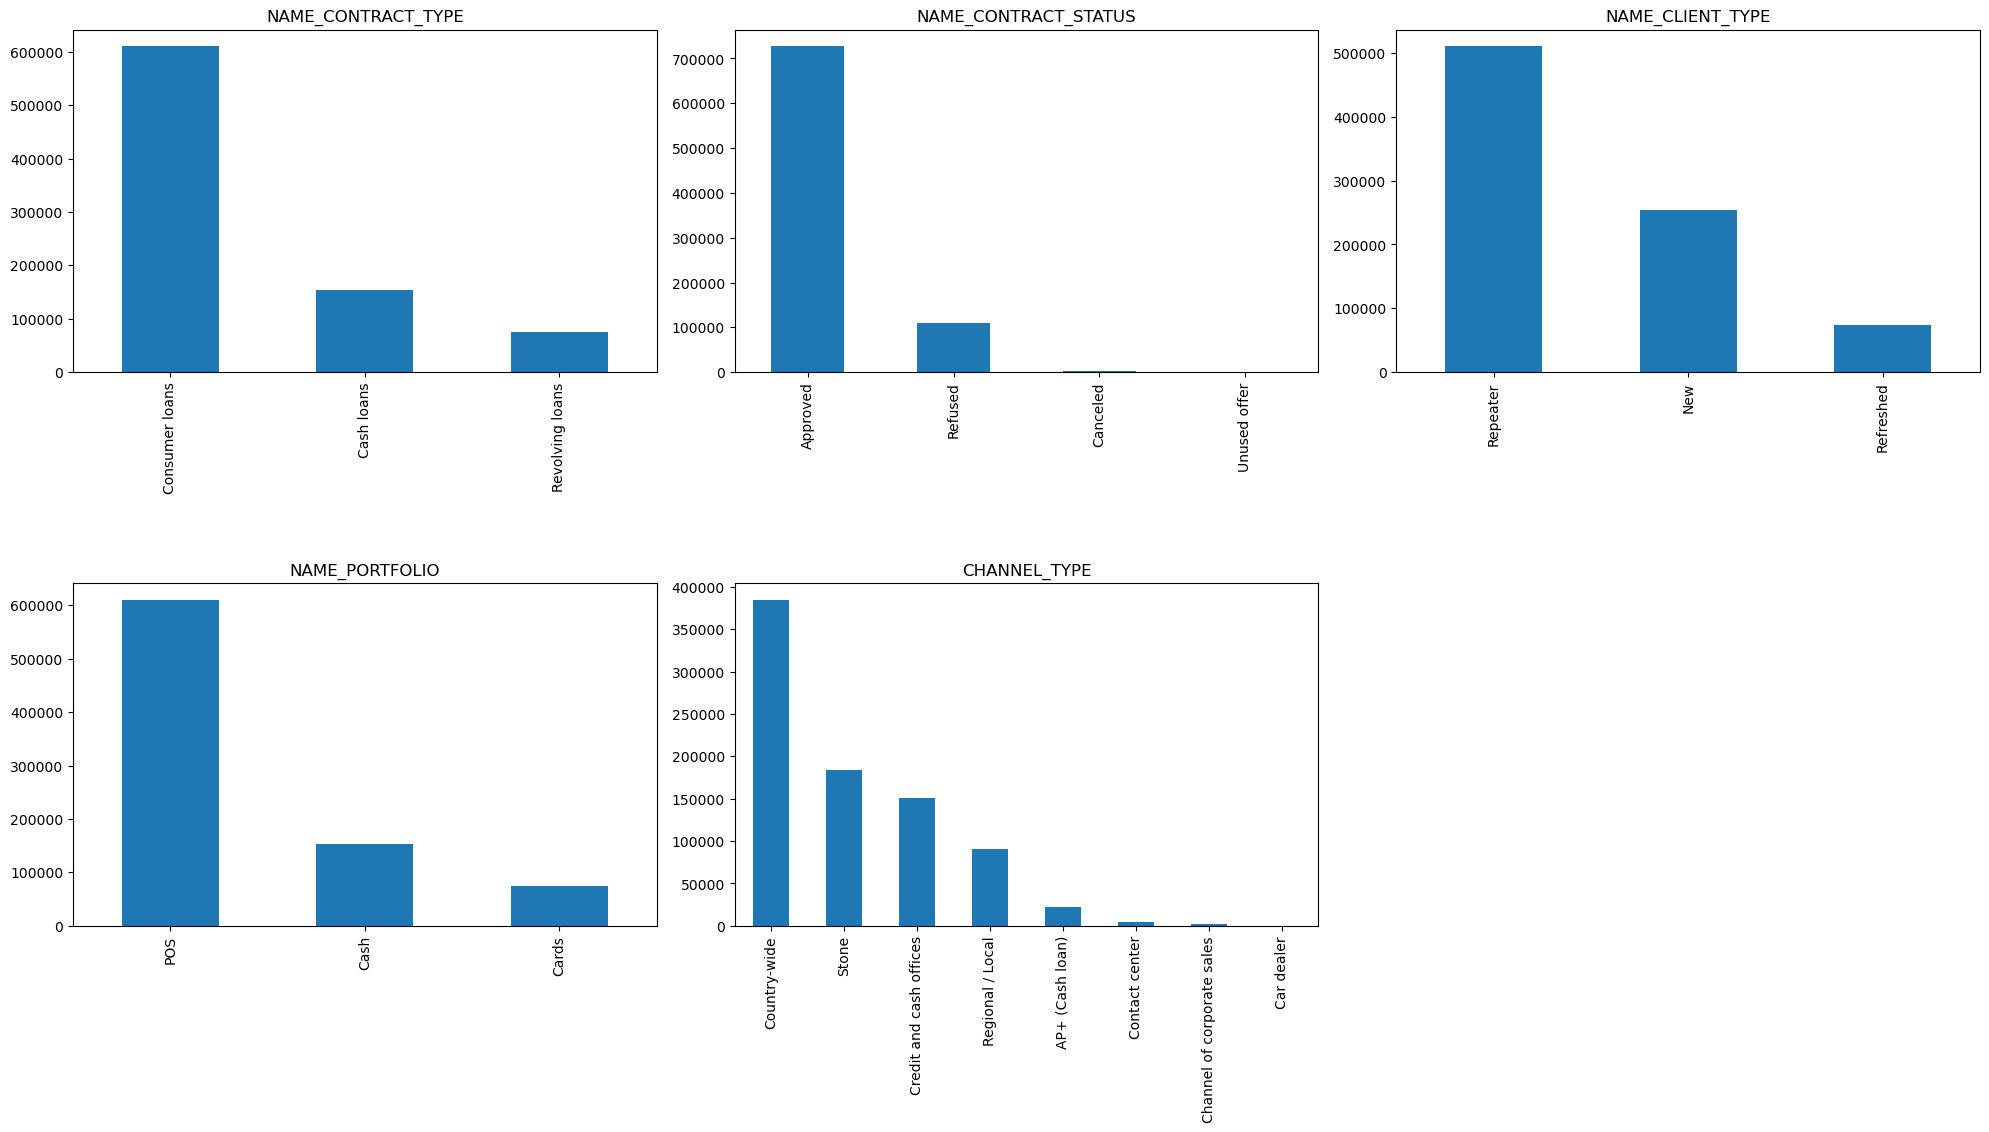

In [237]:
# Listing columns for checking data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']    

k = 0
plt.figure(figsize=(20, 15))
for col in col_list:
    k += 1
    plt.subplot(3, 3, k)
    df_previous[col].value_counts().plot(kind='bar')
    plt.title(col)
plt.tight_layout()  
plt.show()  

We can see that there is data imbalance in below columns:-
1. NAME_CONTRACT_TYPE - There are very few `Revolving Loans`
2. NAME_CONTRACT_STATUS - There are very few `Refused` loans. Almost negligible `Canceled` loans.
3. NAME_CLIENT_TYPE - There are very few `New` applicant. Even fewer `Refreshed` applicants.
4. NAME_PORTFOLIO - Very few application for Cards and Cars
5. CHANNEL_TYPE - Except `Country-Wide`, `Credit and Cash offices` and `Stone` all other channels are very few in muber.

#### Converting `DAYS_DECISION` column into `MONTH_DECISION` column for readablity and analysis

In [239]:
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
df_previous['MONTH_DECISION'] = abs(df_previous['DAYS_DECISION']//30)

In [240]:
# Drop 'DAYS_DECISION' column
df_previous = df_previous.drop(['DAYS_DECISION'],axis=1)

In [241]:
df_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      2030495      271877     Consumer loans     1730.430          17145.0   
2      2523466      122040         Cash loans    15060.735         112500.0   
13     1397919      321676     Consumer loans     7654.860          53779.5   
14     2273188      270658     Consumer loans     9644.220          26550.0   
15     1232483      151612     Consumer loans    21307.455         126490.5   

    AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  \
0      17145.0          17145.0             Approved         Repeater   
2     136444.5         112500.0             Approved         Repeater   
13     57564.0          53779.5             Approved              New   
14     27252.0          26550.0             Approved              New   
15    119853.0         126490.5             Approved              New   

   NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT  \
0             POS             Country-wide                35         12.0   
2            Cash  Credit and cash offices                -1         12.0   
13            POS             Country-wide               200          8.0   
14            POS                    Stone                83          3.0   
15            POS         Regional / Local               130          6.0   

               PRODUCT_COMBINATION  MONTH_DECISION  
0         POS mobile with interest               3  
2                Cash X-Sell: high              11  
13  POS household without interest              14  
14     POS household with interest              25  
15         POS other with interest              24

In [242]:
df_previous.shape

(839579, 15)

### Merging Current application and Previous application dataset

In [245]:
# Define the columns to select from the current application dataset
cols_current_application = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP','EXT_SCORE_AVG_CATEGORY']

In [246]:
# Select the columns for merging
df_current_application_to_merge = df[cols_current_application]
df_current_application_to_merge.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100004       0           M  Secondary / secondary special   
3      100006       0           F  Secondary / secondary special   
4      100007       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS AGE_GROUP INCOME_GROUP EXT_SCORE_AVG_CATEGORY  
0  Single / not married     Young         High                    Low  
1               Married   Mid Age         High                 Medium  
2  Single / not married   Mid Age          Low                   High  
3        Civil marriage   Mid Age       Medium                 Medium  
4  Single / not married   Mid Age       Medium                 Medium

In [247]:
# Drop the columns from the previous application dataset
cols_prev_application_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [248]:
# Creating a dataset from previous application for merging
df_prev_application_to_merge = df_previous.drop(cols_prev_application_to_drop,axis=1)
df_prev_application_to_merge.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      2030495      271877     Consumer loans     1730.430          17145.0   
2      2523466      122040         Cash loans    15060.735         112500.0   
13     1397919      321676     Consumer loans     7654.860          53779.5   
14     2273188      270658     Consumer loans     9644.220          26550.0   
15     1232483      151612     Consumer loans    21307.455         126490.5   

    AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0      17145.0             Approved         Repeater            POS   
2     136444.5             Approved         Repeater           Cash   
13     57564.0             Approved              New            POS   
14     27252.0             Approved              New            POS   
15    119853.0             Approved              New            POS   

               CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  
0              Country-wide         12.0               3  
2   Credit and cash offices         12.0              11  
13             Country-wide          8.0              14  
14                    Stone          3.0              25  
15         Regional / Local          6.0              24

In [249]:
# Merge the datasets on 'SK_ID_CURR' with a left join
df_merged = pd.merge(df_prev_application_to_merge, df_current_application_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
2     1397919      321676     Consumer loans     7654.860          53779.5   
3     2273188      270658     Consumer loans     9644.220          26550.0   
4     1232483      151612     Consumer loans    21307.455         126490.5   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    136444.5             Approved         Repeater           Cash   
2     57564.0             Approved              New            POS   
3     27252.0             Approved              New            POS   
4    119853.0             Approved              New            POS   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3     0.0           F   
1  Credit and cash offices         12.0              11     0.0           F   
2             Country-wide          8.0              14     NaN         NaN   
3                    Stone          3.0              25     NaN         NaN   
4         Regional / Local          6.0              24     0.0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS AGE_GROUP INCOME_GROUP  \
0              Incomplete higher            Married   Mid Age         High   
1  Secondary / secondary special            Married     Young          Low   
2                            NaN                NaN       NaN          NaN   
3                            NaN                NaN       NaN          NaN   
4  Secondary / secondary special            Married     Young         High   

  EXT_SCORE_AVG_CATEGORY  
0                   High  
1                    Low  
2                    NaN  
3                    NaN  
4                 Medium

In [250]:
len(df_merged[np.isnan(df_merged['TARGET'])])

172924

We can see that there are NaN values in the current application columns in the merged datasets. Because few `SK_ID_CURR` are present in the previous application dataset, but those IDs are not present in the current application dataset.
Eg:- `SK_ID_CURR == 176158` is present in the previous application but not in present.
We will remove those such records.

In [251]:
# Remove rows where 'TARGET' is NaN, indicating missing data from the current application
df_merged = df_merged.dropna(subset=['TARGET'])       

In [252]:
# Convert the 'TARGET' column to integer type
df_merged['TARGET'] = df_merged['TARGET'].astype(int)

In [253]:
# Create a new column 'PERCENT_CREDIT' to indicate the percentage of the amount credited
df_merged['PERCENT_CREDIT'] = ((df_merged['AMT_CREDIT'] / df_merged['AMT_APPLICATION']) * 100).round(2)
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2523466      122040         Cash loans    15060.735         112500.0   
4     1232483      151612     Consumer loans    21307.455         126490.5   
5     2163253      154602     Consumer loans     4187.340          26955.0   
7     1173070      199178         Cash loans     4666.500          45000.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    136444.5             Approved         Repeater           Cash   
4    119853.0             Approved              New            POS   
5     27297.0             Approved         Repeater            POS   
7     49455.0              Refused         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3       0           F   
1  Credit and cash offices         12.0              11       0           F   
4         Regional / Local          6.0              24       0           M   
5                    Stone          8.0              50       0           M   
7          AP+ (Cash loan)         18.0              20       0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS       AGE_GROUP  \
0              Incomplete higher            Married         Mid Age   
1  Secondary / secondary special            Married           Young   
4  Secondary / secondary special            Married           Young   
5  Secondary / secondary special            Married         Mid Age   
7  Secondary / secondary special            Married  Senior Citizen   

  INCOME_GROUP EXT_SCORE_AVG_CATEGORY  PERCENT_CREDIT  
0         High                   High          100.00  
1          Low                    Low          121.28  
4         High                 Medium           94.75  
5       Medium                 Medium          101.27  
7         High                    Low          109.90

### Univariate analysis on unordered categorical variable

#### Previous Loan status

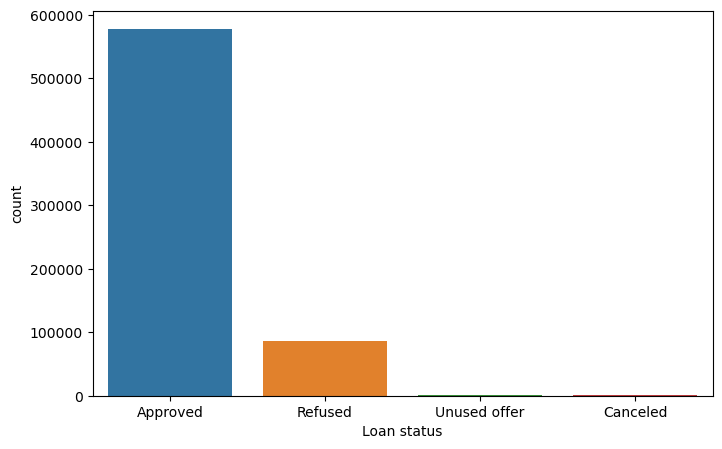

In [254]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_merged)
ax.set(xlabel='Loan status')
plt.show()

##### Inference 
There are huge number of `Approved` loan than `Refused`. Hardly, there are any `Canceled` or `Unused offer` loan.

#### Client type

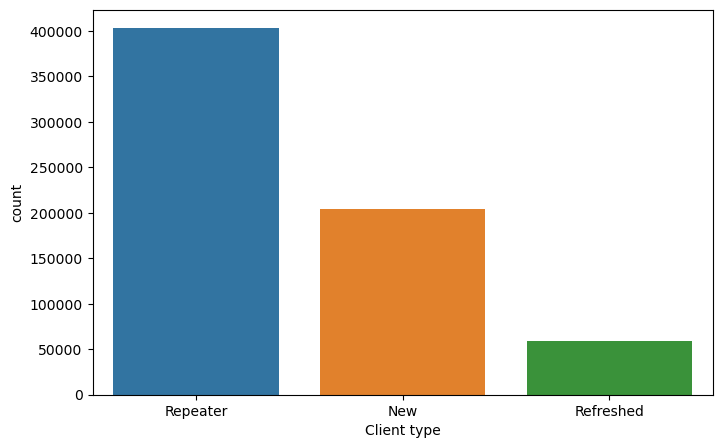

In [255]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=df_merged)
ax.set(xlabel='Client type')
plt.show()

##### Inference
Most of the applicants were `Repeater`

#### Portfolio of the previous applications

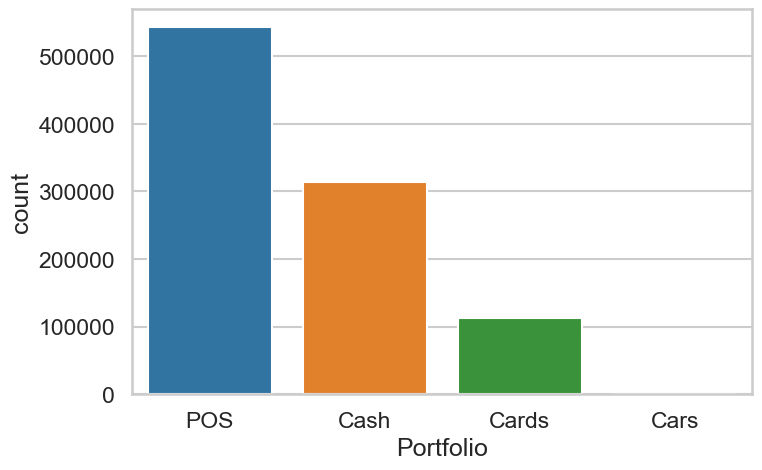

In [304]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=df_merged)
ax.set(xlabel='Portfolio')
plt.show()

##### Inference
Highest number of the previous applications were of POS. Applications for Cash also has a good number. Applications for Cards were very few.

#### Application channel type

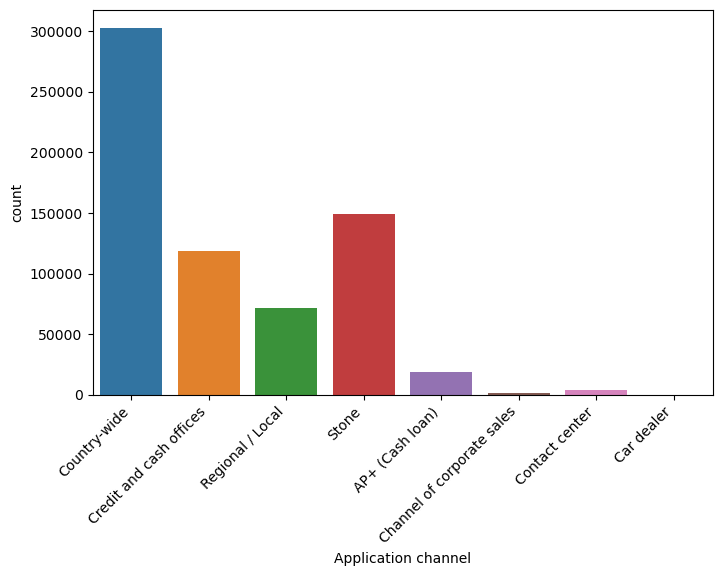

In [256]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=df_merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')
plt.show()

##### Inference
We see that `Country-wide` was heavily used for previous applications followed by `Credit and Cash offices`, `Stone` and `Regional`. Rest other channels are hardly used. 

### Univariate analysis for continuous variables

#### Applied loan amount

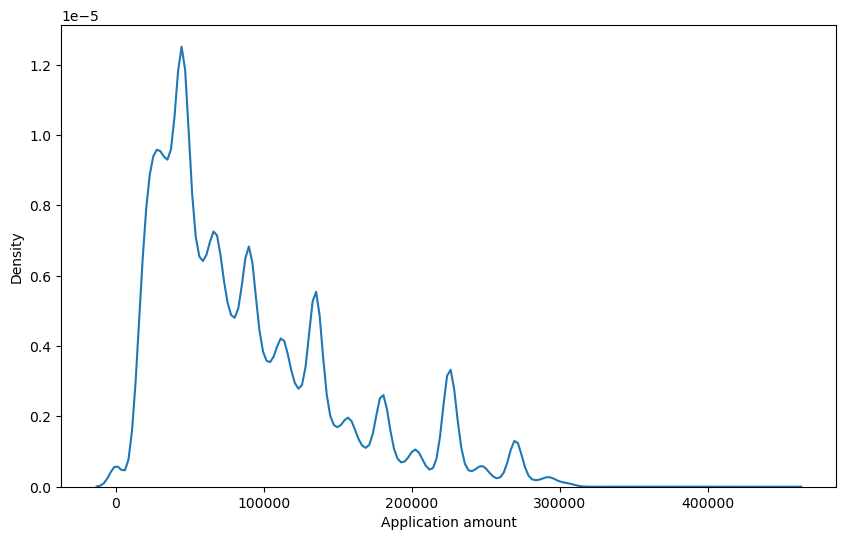

In [257]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')
plt.show()

##### Inference
Most of the applications were for the amount of below 250000 as we see from the above distribution.

#### Credited loan amount

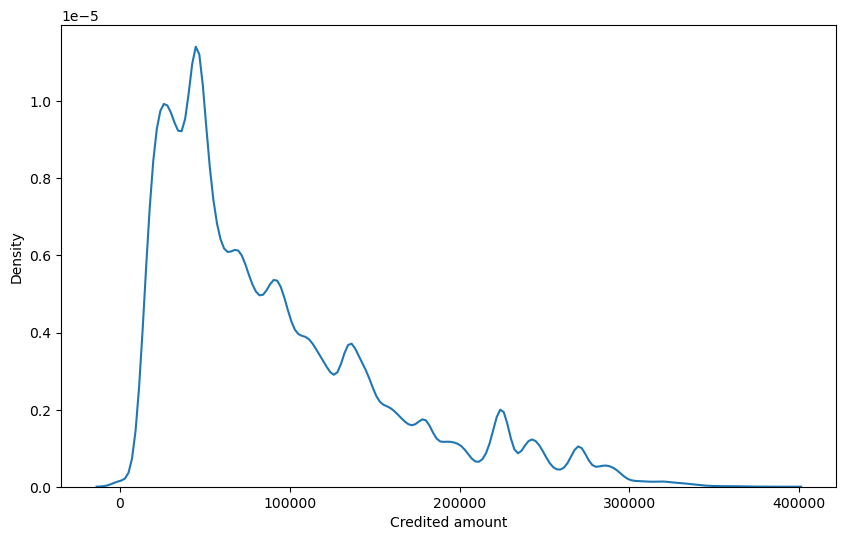

In [258]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_CREDIT'],hist=False)
ax.set(xlabel='Credited amount')
plt.show()

##### Inference
The distribution of the credited amount of the loan was mostly in 250000 range.

#### Months took for the pervious application decision relative to the current application 

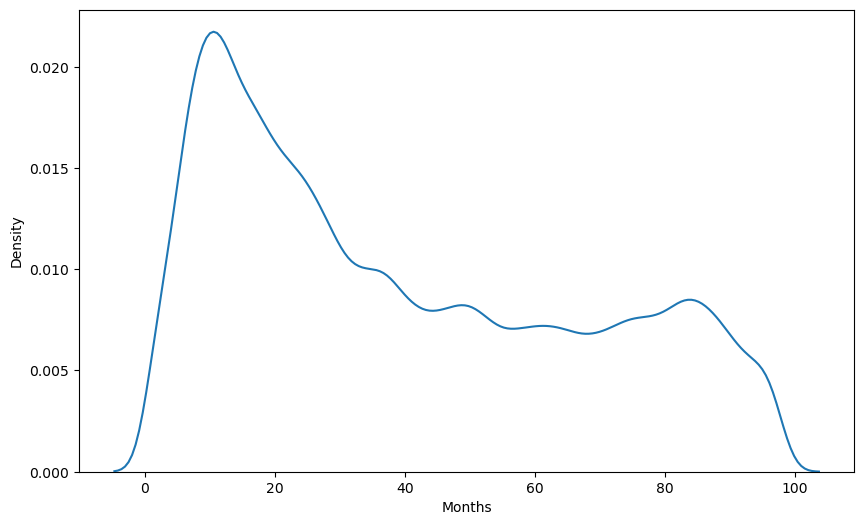

In [259]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['MONTH_DECISION'],hist=False)
ax.set(xlabel='Months')
plt.show()

##### Inference
We can see that most of the applications decision took approximately 30 months. The time taken spread upto 100 months.

## Bivariate analysis

#### Corelation of relevant numerical columns

In [260]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [261]:
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  PERCENT_CREDIT  CNT_PAYMENT  \
0          17145.0     17145.0     1730.430          100.00         12.0   
1         112500.0    136444.5    15060.735          121.28         12.0   
4         126490.5    119853.0    21307.455           94.75          6.0   
5          26955.0     27297.0     4187.340          101.27          8.0   
7          45000.0     49455.0     4666.500          109.90         18.0   

   MONTH_DECISION  
0               3  
1              11  
4              24  
5              50  
7              20

In [262]:
# Corelation matrix
df_merged_corr.corr()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  PERCENT_CREDIT  \
AMT_APPLICATION         1.000000    0.965558     0.801641        0.152487   
AMT_CREDIT              0.965558    1.000000     0.804092        0.314262   
AMT_ANNUITY             0.801641    0.804092     1.000000        0.202030   
PERCENT_CREDIT          0.152487    0.314262     0.202030        1.000000   
CNT_PAYMENT             0.215919    0.243750     0.167491        0.288758   
MONTH_DECISION         -0.254970   -0.274305    -0.178885       -0.242674   

                 CNT_PAYMENT  MONTH_DECISION  
AMT_APPLICATION     0.215919       -0.254970  
AMT_CREDIT          0.243750       -0.274305  
AMT_ANNUITY         0.167491       -0.178885  
PERCENT_CREDIT      0.288758       -0.242674  
CNT_PAYMENT         1.000000        0.100957  
MONTH_DECISION      0.100957        1.000000

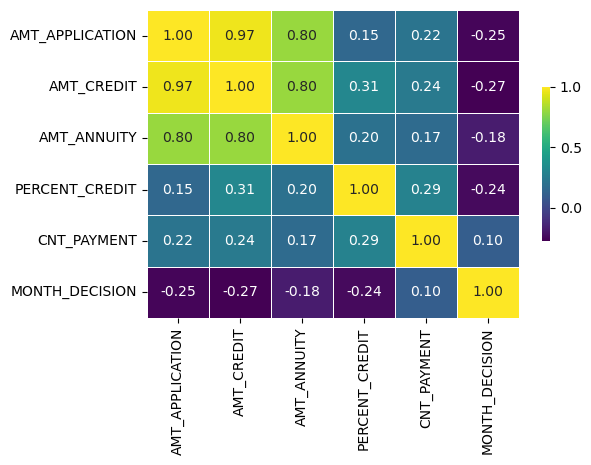

In [263]:
plt.figure(figsize=(6, 4))

# Compute the correlation matrix for the dataframe 'df_merged_corr'
merged_correlation_matrix = df_merged_corr.corr()

sns.heatmap(
    merged_correlation_matrix,     
    cmap="viridis",         
    annot=True,             
    fmt=".2f",             
    linewidths=.5,         
    cbar_kws={"shrink": .5} 
)

plt.show()

**Highly corelate columns**
1. AMT_APPLICATION and AMT_CREDIT (0.98)
2. AMT_APPLICATION and AMT_ANNUITY (0.80)
3. AMT_CREDIT and AMT_APPLIcation(0.97)

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

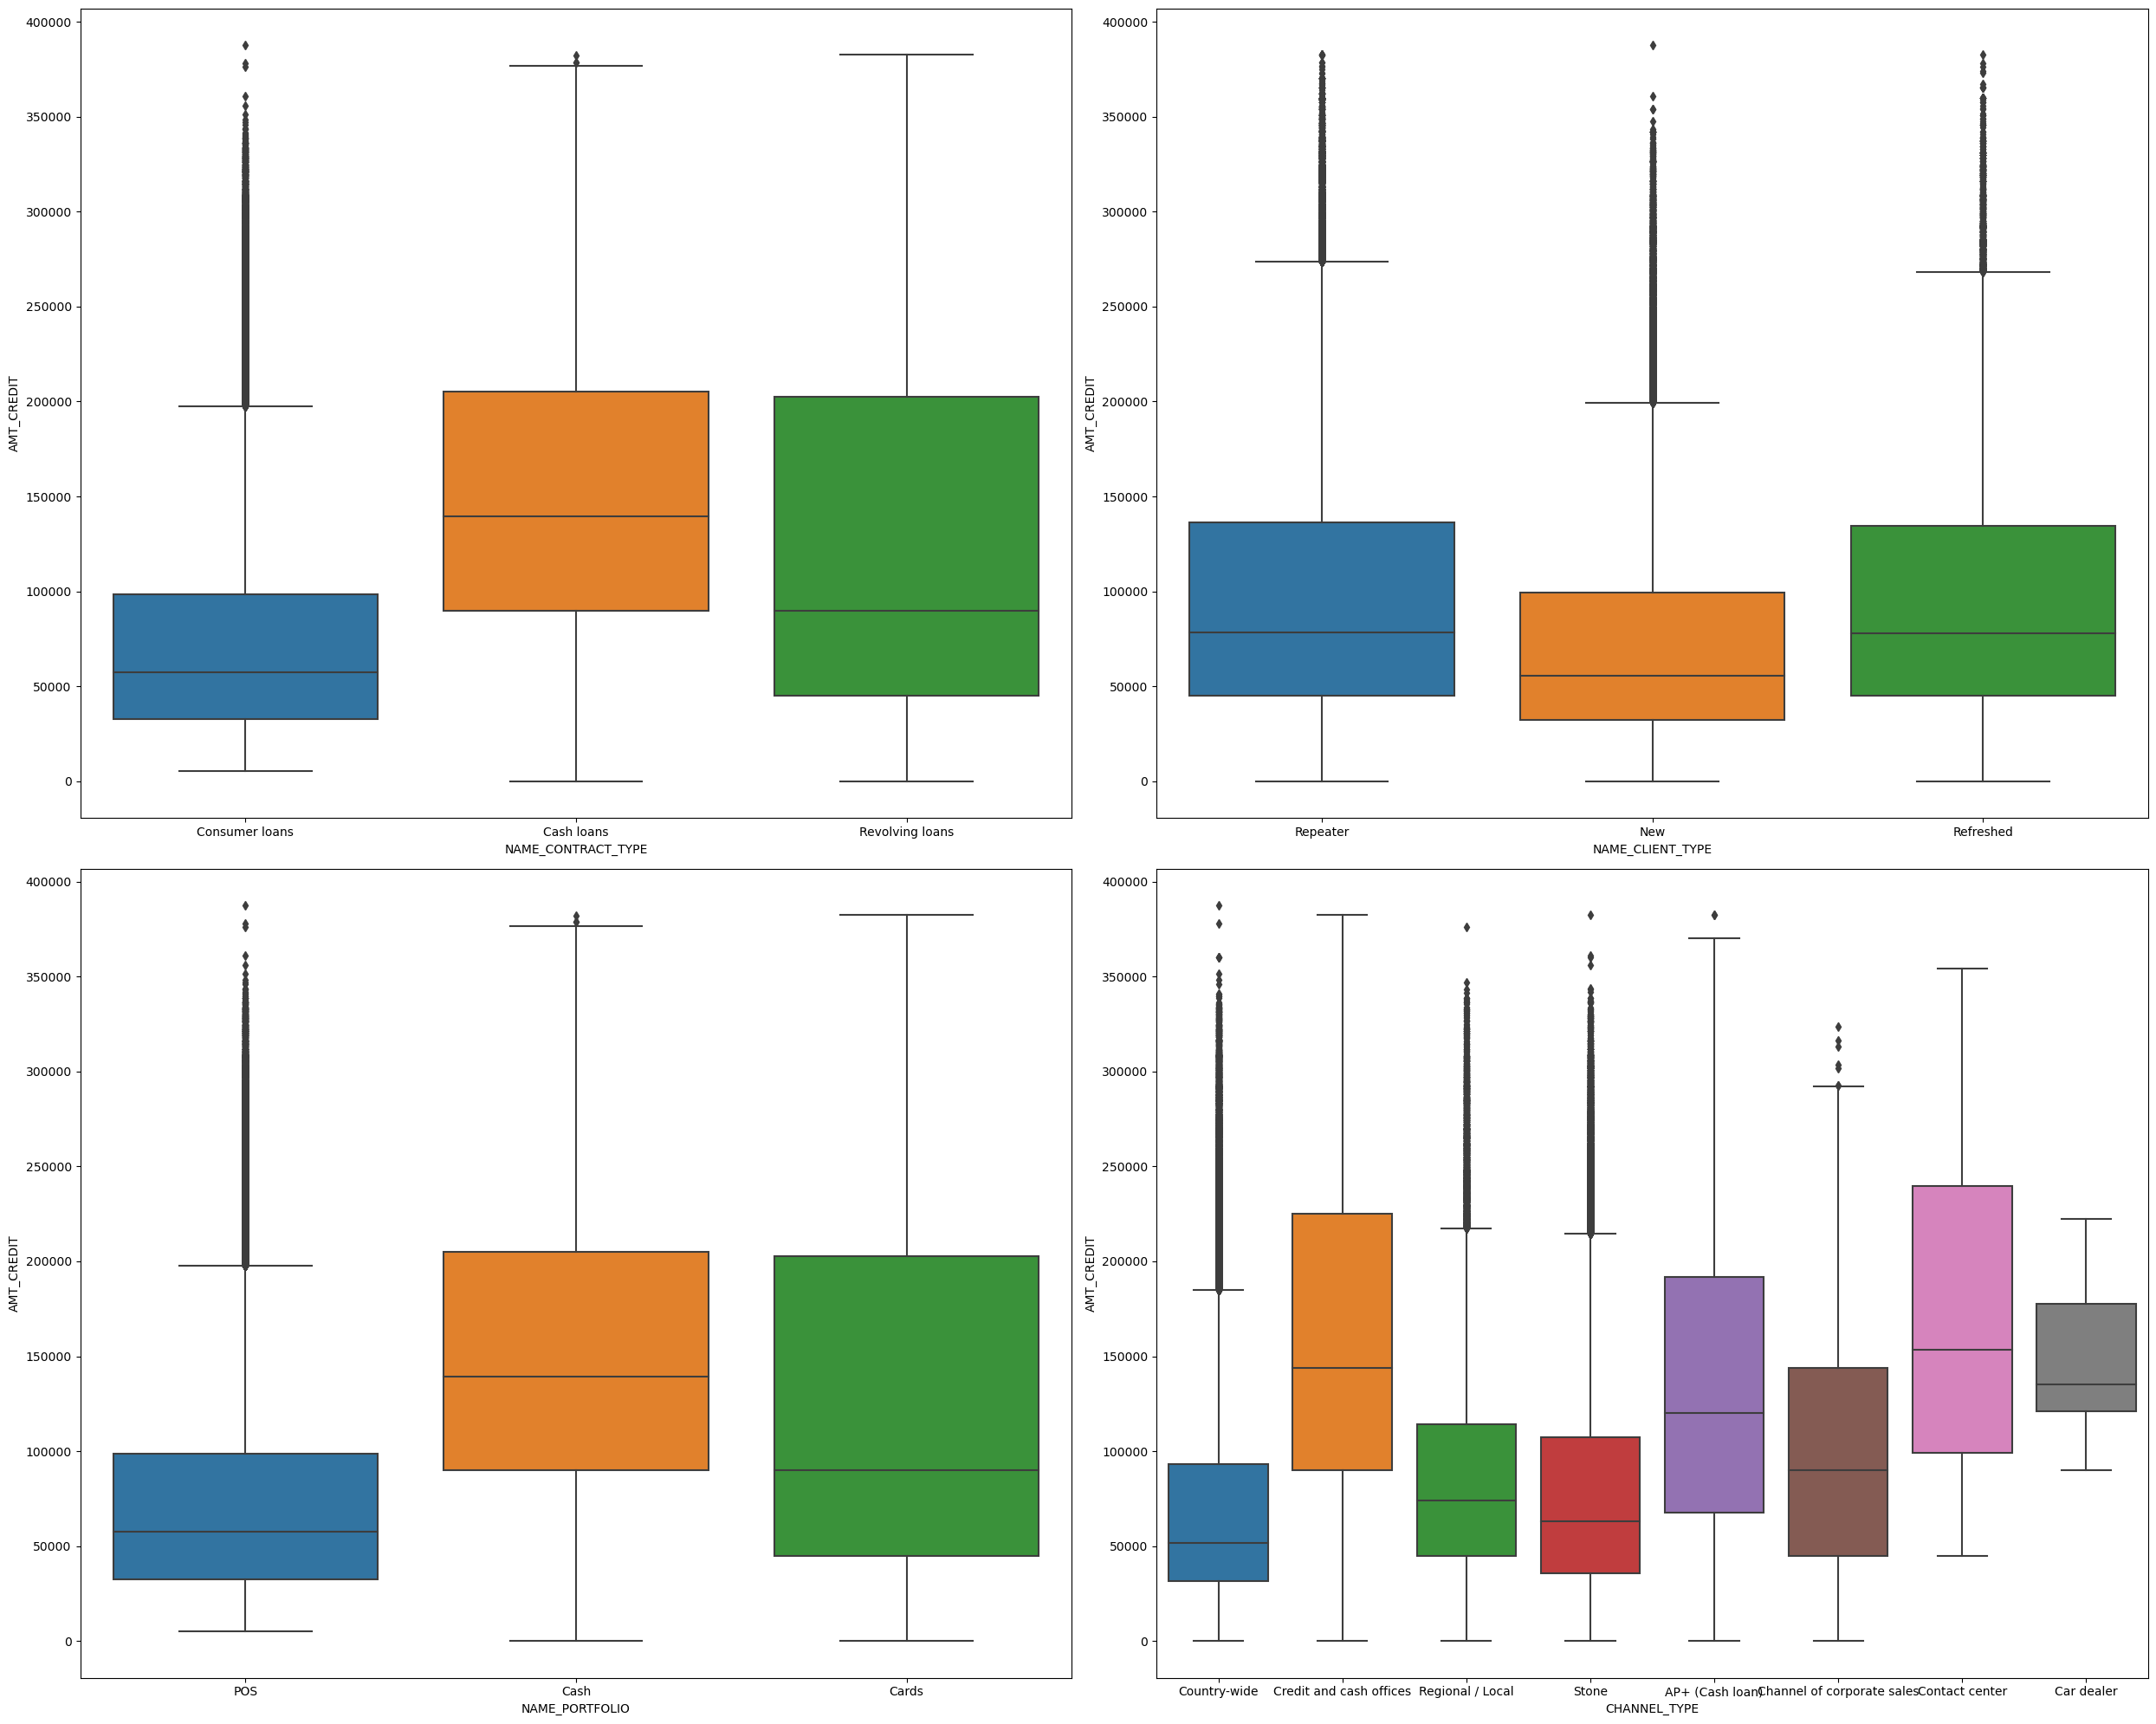

In [264]:
# Define the categories for which boxplots are to be created
categories = ['NAME_CONTRACT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE']
plt.figure(figsize=(25, 20))
k = 0
for category in categories:
    k += 1
    ax = plt.subplot(2, 2, k)
    sns.boxplot(x=category, y='AMT_CREDIT', data=df_merged)
plt.tight_layout()  
plt.show() 

##### Inference
1. `Cash loans` are more credited in amount than Revolving and Consumer loans.
2. `Repeater` clients get more amount loan than new and refreshed clients.
3. The credit amount of the loan is more from the application channel type as `car dealer` followed by `Channel of corporate sales`, `Credit and cash offices` and `Contact center`. The amount is very less for `Regional`, `Stone` and `Country-wide` channels.

#### Anslysis of two segmented variables

#### Status and Client type

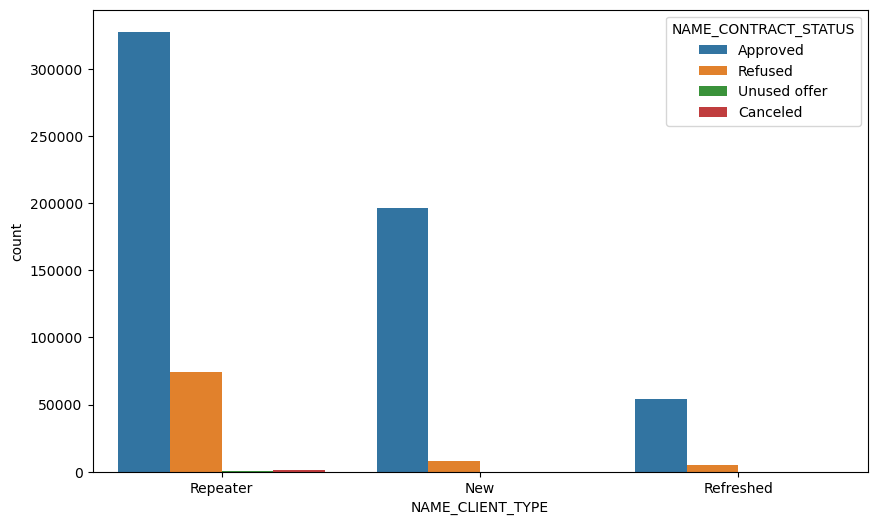

In [265]:
# Set the figure size to ensure the plot is large enough to be clear and legible
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()

##### Inference
We see that the `Repeater` clients have more approved loans than `New` and `Refreshed` clients.

#### Current loan defaulter status with respect to previous loan application status

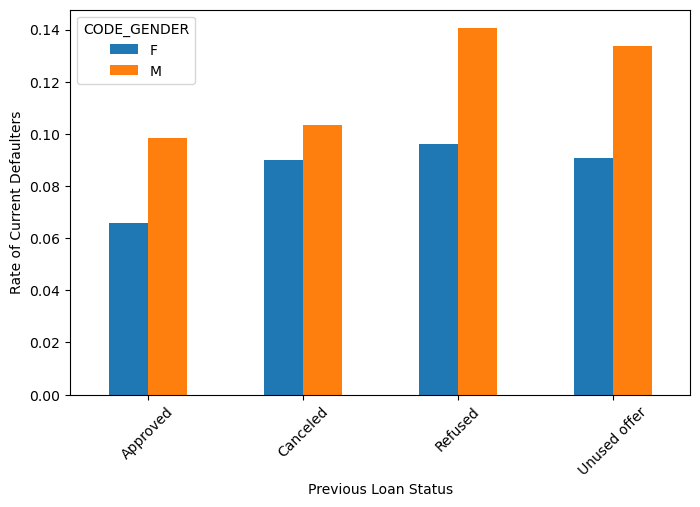

In [266]:
# Pivot table to calculate the mean 'TARGET' values for each combination of 'NAME_CONTRACT_STATUS' and 'CODE_GENDER'
pivot_table = df_merged.pivot_table(values='TARGET', index='NAME_CONTRACT_STATUS', columns='CODE_GENDER', aggfunc='mean')

pivot_table.plot.bar(figsize=(8, 5), rot=45)
plt.xlabel('Previous Loan Status')
plt.ylabel('Rate of Current Defaulters')

plt.show()

##### Inference
We see that previously `Refused` client is more defaulted than previously `Approved` clients. Also, in all the cases the `Males` are more defaulted than `Females`.

#### Current loan defaulter status with respect to previous loan application status and client types

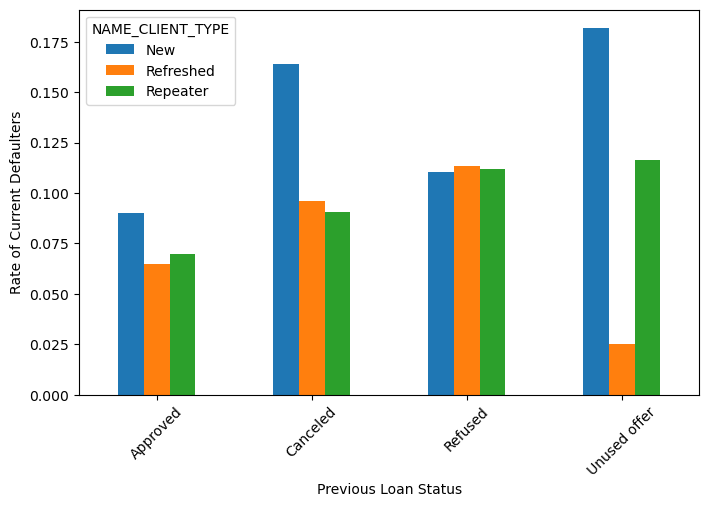

In [267]:
# Pivot table to calculate the mean 'TARGET' values for each 'NAME_CONTRACT_STATUS' and 'NAME_CLIENT_TYPE'
pivot_table = df_merged.pivot_table(values='TARGET', index='NAME_CONTRACT_STATUS', columns='NAME_CLIENT_TYPE', aggfunc='mean')

pivot_table.plot.bar(figsize=(8, 5), rot=45)

plt.xlabel('Previous Loan Status')
plt.ylabel('Rate of Current Defaulters')

plt.show()

##### Inference
1. We can see that the `Defaulters` are more for previously `Canceled` loan status clients, who were `New`.
2. For previously `Approved` status the `New` clients were more defaulted followed by `Repeater`.
3. For previously `Refused` applicants the `Defaulters` are more `Refreshed` clients.
4. For previously `Canceled` applicants the `Defaulters` are more `New` clients.

#### Current loan defaulter status with respect to previous loan application status and age group

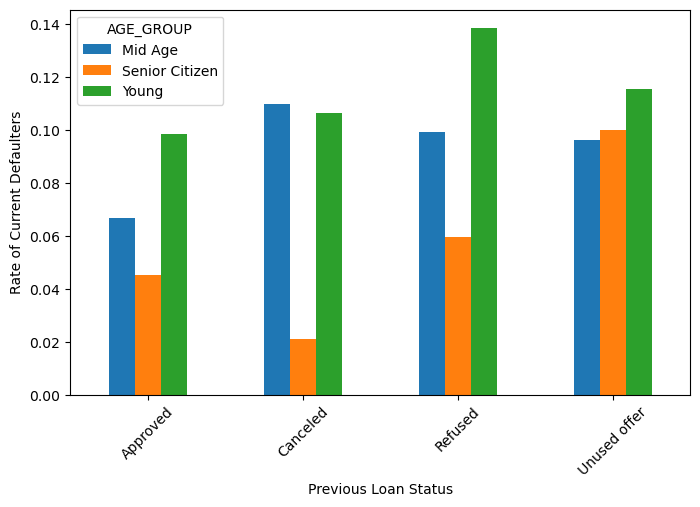

In [268]:
# Pivot table to calculate the mean 'TARGET' values for each 'NAME_CONTRACT_STATUS' across different 'AGE_GROUP'
pivot_table_age = df_merged.pivot_table(values='TARGET', index='NAME_CONTRACT_STATUS', columns='AGE_GROUP', aggfunc='mean')

pivot_table_age.plot.bar(figsize=(8, 5), rot=45)
plt.xlabel('Previous Loan Status')
plt.ylabel('Rate of Current Defaulters')

plt.show()

##### Inference
1. For all the previous status `Young` applicants are more defaulted.
2. For all the previous status `Senior` applicants are less defaulted compared to others.

#### Current loan defaulter status with respect to previous loan application status and income group

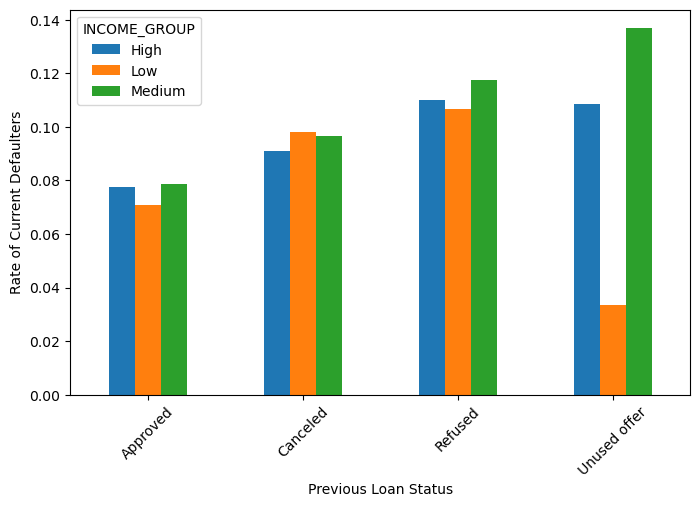

In [269]:
# Pivot table to calculate the mean 'TARGET' values for each 'NAME_CONTRACT_STATUS' across different 'INCOME_GROUP'
pivot_table_income = df_merged.pivot_table(values='TARGET', index='NAME_CONTRACT_STATUS', columns='INCOME_GROUP', aggfunc='mean')

pivot_table_income.plot.bar(figsize=(8, 5), rot=45)

plt.xlabel('Previous Loan Status')
plt.ylabel('Rate of Current Defaulters')

plt.show()

##### Inference
1. For previously `Unused` offer the `Medium` income group was more defaulted and `Low` income group is the least.
2. For other application status more or less all the income groups are equally defaulted. 

#### Current loan defaulter status with respect to previous loan application status and portfolio of the loan

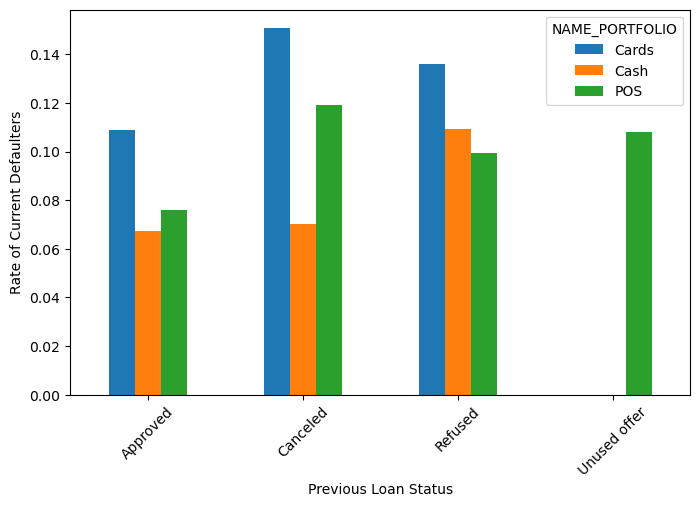

In [270]:
# Pivot table with the mean of 'TARGET' for each combination of 'NAME_CONTRACT_STATUS' and 'NAME_PORTFOLIO'
pivot_table_portfolio = df_merged.pivot_table(values='TARGET', index='NAME_CONTRACT_STATUS', columns='NAME_PORTFOLIO', aggfunc='mean')

pivot_table_portfolio.plot.bar(figsize=(8, 5), rot=45)

plt.xlabel('Previous Loan Status')
plt.ylabel('Rate of Current Defaulters')


plt.show()

##### Inference
1. Most of the clients were defaulted, who previously applied loan for `Cards`.
2. For `Refused` loan status the clients applied for `POS` are less defaulted.

#### Current loan defaulter status with respect to previous loan application status and external source score category

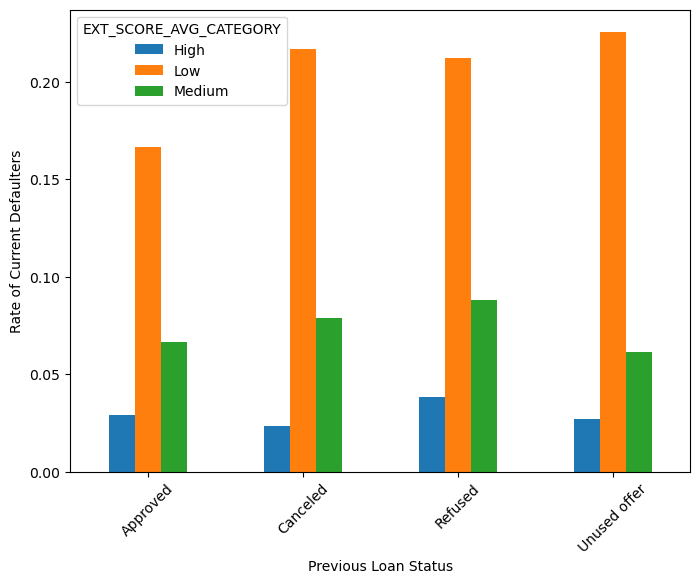

In [273]:
# Pivot table with the mean default rate ('TARGET') for each 'NAME_CONTRACT_STATUS' and 'EXT_SCORE_CATEGORY'
pivot_table_ext_score = df_merged.pivot_table(values='TARGET', index='NAME_CONTRACT_STATUS', columns='EXT_SCORE_AVG_CATEGORY', aggfunc='mean')

pivot_table_ext_score.plot.bar(figsize=(8, 6), rot=45)

plt.xlabel('Previous Loan Status')
plt.ylabel('Rate of Current Defaulters')


plt.show()

##### Inference
1. Applicants with low external source score are highly defaulted.
2. Higher scorer applicants are very unlikely to commit default irrespective of their previous loan status.